In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.cm import get_cmap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.ticker import MaxNLocator
import glob
import re
import os

In [2]:
data_path = "C:/Users/Costa/UNIVERSITÀ/tesi/mw abs data/ALL DATA/"
tscan_path = data_path + "Tscan/"
save_fig = "C:/Users/Costa/UNIVERSITÀ/tesi/mw abs data/riassunto/"
save_thesis = "C:/Users/Costa/UNIVERSITÀ/tesi/scrittura tesi/pictures/"



In [3]:
def normalize(y, yerr):
    scale = np.max(y) - np.min(y)
    y_norm = (y - np.min(y)) / scale
    yerr_norm = yerr / scale
    print("scale",scale)
    return y_norm, yerr_norm

def normalize_in_range(x, y, yerr, x_shift=0, x_range=(45, 75)):
    x_shifted = x + x_shift
    mask = (x_shifted >= x_range[0]) & (x_shifted <= x_range[1])
    y_min, y_max = np.min(y[mask]), np.max(y[mask])
    y_norm = (y - y_min) / (y_max - y_min)
    yerr_norm = yerr / (y_max - y_min)
    return x_shifted, y_norm, yerr_norm, y_max-y_min


## Reading full sweep

In [4]:
samples = ['28b', '24a', '27a','19a','21a', '25a','28a', 'LAO']
silver = ['Ag0', 'Ag15', 'Ag5', 'Ag10']
file_names = ['field', 'int', 'temp', 'min', 'diff']

data = {}

for sample in samples:
    for sil in silver:
        data[sample, sil] = {}

        for file_name in file_names:
            path = data_path+f"{sample}_{sil}_{file_name}.npy"
            
            if glob.glob(path): #check if file exists
                loaded_data = np.load(path, allow_pickle=True)
                data[sample, sil][file_name] = loaded_data
            else:
                continue

field_28b_ag0 = data['28b','Ag0']['field']
int_28b_ag0 = data['28b','Ag0']['int']
temp_28b_ag0 = data['28b','Ag0']['temp']
min_28b_ag0 = data['28b','Ag0']['min']
diff_28b_ag0 = data['28b','Ag0']['diff']

field_28b_ag15 = data['28b','Ag15']['field']
int_28b_ag15 = data['28b','Ag15']['int']
temp_28b_ag15 = data['28b','Ag15']['temp']
min_28b_ag15 = data['28b','Ag15']['min']
diff_28b_ag15 = data['28b','Ag15']['diff']

field_24a_ag0 = data['24a','Ag0']['field']
int_24a_ag0 = data['24a','Ag0']['int']
temp_24a_ag0 = data['24a','Ag0']['temp']
min_24a_ag0 = data['24a','Ag0']['min']
diff_24a_ag0 = data['24a','Ag0']['diff']

field_24a_ag15 = data['24a','Ag15']['field']
int_24a_ag15 = data['24a','Ag15']['int']
temp_24a_ag15 = data['24a','Ag15']['temp']
min_24a_ag15 = data['24a','Ag15']['min']
diff_24a_ag15 = data['24a','Ag15']['diff']

field_data2 =  np.load(data_path + "24a_Ag15_tdep_field.npy" , allow_pickle=True)
int_data2 =  np.load(data_path + "24a_Ag15_tdep_int.npy" , allow_pickle=True)
temp_data2 =  np.load(data_path + "24a_Ag15_tdep_temp.npy" , allow_pickle=True)
min_data2 =  np.load(data_path + "24a_Ag15_tdep_min.npy" , allow_pickle=True)
diff_data2 =  np.load(data_path + "24a_Ag15_tdep_diff.npy" , allow_pickle=True)

field_27a_ag0 = data['27a','Ag0']['field']
int_27a_ag0 = data['27a','Ag0']['int']
temp_27a_ag0 = data['27a','Ag0']['temp']
min_27a_ag0 = data['27a','Ag0']['min']
diff_27a_ag0 = data['27a','Ag0']['diff']

field_27a_ag15 = data['27a','Ag15']['field']
int_27a_ag15 = data['27a','Ag15']['int']
temp_27a_ag15 = data['27a','Ag15']['temp']
min_27a_ag15 = data['27a','Ag15']['min']
diff_27a_ag15 = data['27a','Ag15']['diff']

field_19a_ag0 = data['19a','Ag0']['field']
int_19a_ag0 = data['19a','Ag0']['int']
temp_19a_ag0 = data['19a','Ag0']['temp']
min_19a_ag0 = data['19a','Ag0']['min']
diff_19a_ag0 = data['19a','Ag0']['diff']

field_21a_ag0 = data['21a','Ag0']['field']
int_21a_ag0 = data['21a','Ag0']['int']
temp_21a_ag0 = data['21a','Ag0']['temp']
min_21a_ag0 = data['21a','Ag0']['min']
diff_21a_ag0 = data['21a','Ag0']['diff']

field_21a_inplane =  np.load(data_path + "21a_Ag0_field_inplane.npy" , allow_pickle=True)
int_21a_inplane =  np.load(data_path + "21a_Ag0_int_inplane.npy" , allow_pickle=True)
temp_21a_inplane =  np.load(data_path + "21a_Ag0_temp_inplane.npy" , allow_pickle=True)

field_25a_ag0 = data['25a','Ag0']['field']
int_25a_ag0 = data['25a','Ag0']['int']
temp_25a_ag0 = data['25a','Ag0']['temp']
min_25a_ag0 = data['25a','Ag0']['min']
diff_25a_ag0 = data['25a','Ag0']['diff']

field_25a_ag0_3004 =  np.load(data_path + "25a_Ag0_field_3004.npy" , allow_pickle=True)
int_25a_ag0_3004 =  np.load(data_path + "25a_Ag0_int_3004.npy" , allow_pickle=True)
temp_25a_ag0_3004 =  np.load(data_path + "25a_Ag0_temp_3004.npy" , allow_pickle=True)

field_25a_ag0_2204 =  np.load(data_path + "25a_Ag0_field_2204.npy" , allow_pickle=True)
int_25a_ag0_2204 =  np.load(data_path + "25a_Ag0_int_2204.npy" , allow_pickle=True)
temp_25a_ag0_2204 =  np.load(data_path + "25a_Ag0_temp_2204.npy" , allow_pickle=True)

field_25a_ag5 = data['25a','Ag5']['field']
int_25a_ag5 = data['25a','Ag5']['int']
temp_25a_ag5 = data['25a','Ag5']['temp']

field_25a_ag10 = data['25a','Ag10']['field']
int_25a_ag10 = data['25a','Ag10']['int']
temp_25a_ag10 = data['25a','Ag10']['temp']

field_25a_ag15 = data['25a','Ag15']['field']
int_25a_ag15 = data['25a','Ag15']['int']
temp_25a_ag15 = data['25a','Ag15']['temp']



field_28a_ag0 = data['28a','Ag0']['field']
int_28a_ag0 = data['28a','Ag0']['int']
temp_28a_ag0 = data['28a','Ag0']['temp']
min_28a_ag0 = data['28a','Ag0']['min']
diff_28a_ag0 = data['28a','Ag0']['diff']

field_lao = data['LAO','Ag0']['field']
int_lao = data['LAO','Ag0']['int']
temp_lao = data['LAO','Ag0']['temp']
min_lao = data['LAO','Ag0']['min']
diff_lao = data['LAO','Ag0']['diff']

field_25a_ag5_check =  np.load(data_path + "25a_Ag5_field_check.npy" , allow_pickle=True)
int_25a_ag5_check =  np.load(data_path + "25a_Ag5_int_check.npy" , allow_pickle=True)
temp_25a_ag5_check =  np.load(data_path + "25a_Ag5_temp_check.npy" , allow_pickle=True)

## Reading tscan

In [34]:
samples = ['28b', '24a', '27a','25a','28a','26a','19a']
silver = ['Ag0', 'Ag15', 'Ag5', 'Ag10']
file_names = ['temp', 'mean', 'err', 'temp2', 'mean2', 'err2', 'temp_0', 'mean_0', 'err_0',
              'temp_check', 'mean_check', 'err_check','temp_check_in', 'mean_check_in', 'err_check_in', 
              'temp_2204', 'mean_2204', 'err_2204', 'temp_2204_0', 'mean_2204_0', 'err_2204_0', 'temp_0f', 'mean_0f', 'err_0f', 
              'temp_2204_1k', 'mean_2204_1k', 'err_2204_1k', 'temp_2204_5deg', 'mean_2204_5deg', 'err_2204_5deg', 'temp_2204_5deg_0', 'mean_2204_5deg_0', 'err_2204_5deg_0',
               'temp_2904', 'mean_2904', 'err_2904', 'temp_2904_in', 'mean_2904_in', 'err_2904_in',
                'temp_3004', 'mean_3004', 'err_3004', 'temp_3004_in', 'mean_3004_in', 'err_3004_in']

data_tscan = {}

for sample in samples:
    for sil in silver:
        data_tscan[sample, sil] = {}

        for file_name in file_names:
            path = tscan_path+f"{sample}_{sil}_tscan_{file_name}.npy"
            # print(path)
            if glob.glob(path): #check if file exists
                loaded_data = np.load(path, allow_pickle=True)
                data_tscan[sample, sil][file_name] = loaded_data
                if sample=='19a':
                    print(sample, sil, file_name)
            else:
                continue

tscan_24a_ag15 = [data_tscan['24a','Ag15']['temp'], data_tscan['24a','Ag15']['mean'], data_tscan['24a','Ag15']['err']]

# 27a concatenated -------------------------------------------------------------------------------------------------
tscan_27a_ag0 = [data_tscan['27a','Ag0']['temp'], data_tscan['27a','Ag0']['mean'], data_tscan['27a','Ag0']['err']]
tscan_27a_ag0_2 = [data_tscan['27a','Ag0']['temp2'], data_tscan['27a','Ag0']['mean2'], data_tscan['27a','Ag0']['err2']]
x1 = tscan_27a_ag0[0][1:110]
x2 = tscan_27a_ag0[0][117:]
x3 = tscan_27a_ag0_2[0][4:-1]
y1 = tscan_27a_ag0[1][1:110]
y2 = tscan_27a_ag0[1][117:]
y3 = tscan_27a_ag0_2[1][4:-1]
yerr1 = tscan_27a_ag0[2][1:110]
yerr2 = tscan_27a_ag0[2][117:]
yerr3 = tscan_27a_ag0_2[2][4:-1]

x_all = np.concatenate((x1, x2, x3))
y_all = np.concatenate((y1, y2, y3))
yerr_all = np.concatenate((yerr1, yerr2, yerr3))

sorted_indices = np.argsort(x_all)
x_sorted = x_all[sorted_indices]
y_sorted = y_all[sorted_indices]
yerr_sorted = yerr_all[sorted_indices]
#--------------------------------------------------------------------------------------------------------------------
tscan_27a_ag0 = [x_sorted, y_sorted, yerr_sorted]
tscan_27a_ag15 = [data_tscan['27a','Ag15']['temp'], data_tscan['27a','Ag15']['mean'], data_tscan['27a','Ag15']['err']]
tscan_25a_ag0 = [data_tscan['25a','Ag0']['temp'], data_tscan['25a','Ag0']['mean'], data_tscan['25a','Ag0']['err']]
tscan_28a_ag0 = [data_tscan['28a','Ag0']['temp'], data_tscan['28a','Ag0']['mean'], data_tscan['28a','Ag0']['err']]
tscan_28a_ag15 = [data_tscan['28a','Ag15']['temp'], data_tscan['28a','Ag15']['mean'], data_tscan['28a','Ag15']['err']]
tscan_28b_ag0 = [data_tscan['28b','Ag0']['temp'], data_tscan['28b','Ag0']['mean'], data_tscan['28b','Ag0']['err']]
tscan_28b_ag15 = [data_tscan['28b','Ag15']['temp'], data_tscan['28b','Ag15']['mean'], data_tscan['28b','Ag15']['err']]
tscan_26a_ag0 = [data_tscan['26a','Ag0']['temp'], data_tscan['26a','Ag0']['mean'], data_tscan['26a','Ag0']['err']]
tscan_26a_ag15 = [data_tscan['26a','Ag15']['temp'], data_tscan['26a','Ag15']['mean'], data_tscan['26a','Ag15']['err']]
tscan_27a_ag0_cool0field = [data_tscan['27a','Ag0']['temp_0'], data_tscan['27a','Ag0']['mean_0'], data_tscan['27a','Ag0']['err_0']]
tscan_27a_ag5 = [data_tscan['27a','Ag5']['temp'], data_tscan['27a','Ag5']['mean'], data_tscan['27a','Ag5']['err']]
tscan_27a_ag10 = [data_tscan['27a','Ag10']['temp'], data_tscan['27a','Ag10']['mean'], data_tscan['27a','Ag10']['err']]
tscan_28b_ag10 = [data_tscan['28b','Ag10']['temp'], data_tscan['28b','Ag10']['mean'], data_tscan['28b','Ag10']['err']]
tscan_28b_ag5 = [data_tscan['28b','Ag5']['temp'], data_tscan['28b','Ag5']['mean'], data_tscan['28b','Ag5']['err']]

tscan_28b_ag15_check = [data_tscan['28b','Ag15']['temp_check'], data_tscan['28b','Ag15']['mean_check'], data_tscan['28b','Ag15']['err_check']]
tscan_28b_ag15_inplane = [data_tscan['28b','Ag15']['temp_check_in'], data_tscan['28b','Ag15']['mean_check_in'], data_tscan['28b','Ag15']['err_check_in']]

tscan_25a_ag5 = [data_tscan['25a','Ag5']['temp'], data_tscan['25a','Ag5']['mean'], data_tscan['25a','Ag5']['err']]
tscan_25a_ag0_check = [data_tscan['25a','Ag0']['temp_check'], data_tscan['25a','Ag0']['mean_check'], data_tscan['25a','Ag0']['err_check']]
tscan_25a_ag0_2204 = [data_tscan['25a','Ag0']['temp_2204'], data_tscan['25a','Ag0']['mean_2204'], data_tscan['25a','Ag0']['err_2204']]
tscan_25a_ag0_2204_0 = [data_tscan['25a','Ag0']['temp_2204_0'], data_tscan['25a','Ag0']['mean_2204_0'], data_tscan['25a','Ag0']['err_2204_0']]
tscan_25a_ag0_2204_1k = [data_tscan['25a','Ag0']['temp_2204_1k'], data_tscan['25a','Ag0']['mean_2204_1k'], data_tscan['25a','Ag0']['err_2204_1k']]
tscan_25a_ag0_2204_5deg = [data_tscan['25a','Ag0']['temp_2204_5deg'], data_tscan['25a','Ag0']['mean_2204_5deg'], data_tscan['25a','Ag0']['err_2204_5deg']]
tscan_25a_ag0_2204_5deg_0 = [data_tscan['25a','Ag0']['temp_2204_5deg_0'], data_tscan['25a','Ag0']['mean_2204_5deg_0'], data_tscan['25a','Ag0']['err_2204_5deg_0']]

tscan_28a_ag5 = [data_tscan['28a','Ag5']['temp'], data_tscan['28a','Ag5']['mean'], data_tscan['28a','Ag5']['err']]
tscan_28a_ag10 = [data_tscan['28a','Ag10']['temp'], data_tscan['28a','Ag10']['mean'], data_tscan['28a','Ag10']['err']]

tscan_28a_ag15_check = [data_tscan['28a','Ag15']['temp_check'], data_tscan['28a','Ag15']['mean_check'], data_tscan['28a','Ag15']['err_check']]

tscan_27a_ag0_check = [data_tscan['27a','Ag0']['temp_check'], data_tscan['27a','Ag0']['mean_check'], data_tscan['27a','Ag0']['err_check']]
tscan_27a_ag0_0field = [data_tscan['27a','Ag0']['temp_0f'], data_tscan['27a','Ag0']['mean_0f'], data_tscan['27a','Ag0']['err_0f']]


tscan_26a_ag5 = [data_tscan['26a','Ag5']['temp'], data_tscan['26a','Ag5']['mean'], data_tscan['26a','Ag5']['err']]
tscan_26a_ag10 = [data_tscan['26a','Ag10']['temp'], data_tscan['26a','Ag10']['mean'], data_tscan['26a','Ag10']['err']]

tscan_24a_ag10 = [data_tscan['24a','Ag10']['temp'], data_tscan['24a','Ag10']['mean'], data_tscan['24a','Ag10']['err']]
tscan_24a_ag5 = [data_tscan['24a','Ag5']['temp'], data_tscan['24a','Ag5']['mean'], data_tscan['24a','Ag5']['err']]

tscan_25a_ag5_check = [data_tscan['25a','Ag5']['temp_check'], data_tscan['25a','Ag5']['mean_check'], data_tscan['25a','Ag5']['err_check']]

tscan_28b_ag15_2904 = [data_tscan['28b','Ag15']['temp_2904'], data_tscan['28b','Ag15']['mean_2904'], data_tscan['28b','Ag15']['err_2904']]
tscan_28b_ag15_2904_in = [data_tscan['28b','Ag15']['temp_2904_in'], data_tscan['28b','Ag15']['mean_2904_in'], data_tscan['28b','Ag15']['err_2904_in']]

tscan_24a_ag0 = [data_tscan['24a','Ag0']['temp'], data_tscan['24a','Ag0']['mean'], data_tscan['24a','Ag0']['err']]

tscan_25a_ag0_3004 = [data_tscan['25a','Ag0']['temp_3004'], data_tscan['25a','Ag0']['mean_3004'], data_tscan['25a','Ag0']['err_3004']]
tscan_25a_ag0_3004_inplane = [data_tscan['25a','Ag0']['temp_3004_in'], data_tscan['25a','Ag0']['mean_3004_in'], data_tscan['25a','Ag0']['err_3004_in']]

tscan_19a_ag0 = [data_tscan['19a','Ag0']['temp'], data_tscan['19a','Ag0']['mean'], data_tscan['19a','Ag0']['err']]



19a Ag0 temp
19a Ag0 mean
19a Ag0 err
19a Ag0 temp_3004
19a Ag0 mean_3004
19a Ag0 err_3004


# -----------------------------------------------------------------------------------------

In [6]:

T = [5.0, 15.0, 30.0, 50.0, 65.0, 80.0, 300.0]
j = np.where(temp_28b_ag0 == 70.0)[0][0]

print(f"j={j}-->T={temp_28b_ag0[j]}")


plt.figure(figsize=(10,6))
for j in range(len(temp_28b_ag0)):
    
    plt.plot(field_28b_ag0[j], int_28b_ag0[j], label=f"T={temp_28b_ag0[j]}K")

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
# plt.gca().set_yticklabels([])
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), borderpad=1, fontsize=12)
plt.ylabel("Absorption derivative (arb. units)")
plt.xlabel('Magnetic field (G)')
# plt.xlim(0,200)
plt.axvline(40, linestyle="--")
plt.title('28b Ag0')
plt.savefig(save_fig+"28b ag0 angle")
plt.show()
    

IndexError: index 0 is out of bounds for axis 0 with size 0

## Plotting data

### 19A vs 21A

j=0-->T=5.0
i=0-->T=5.0


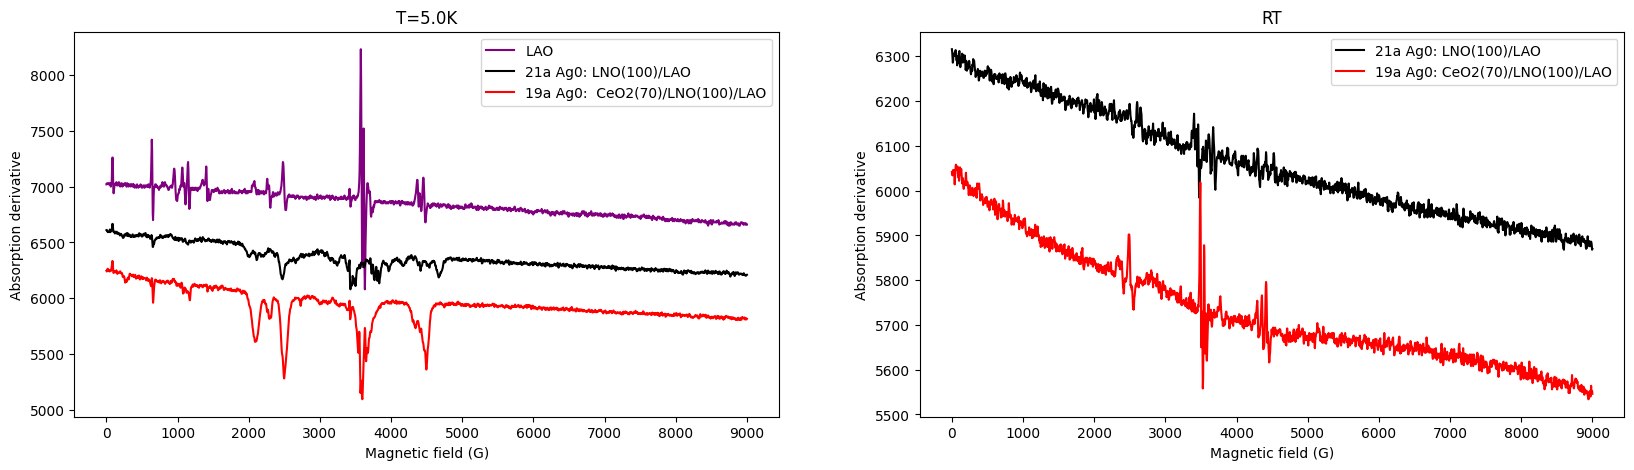

In [52]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

T = 5.0
j = np.where(temp_21a_ag0 == T)[0][0]
i = np.where(temp_19a_ag0 == T)[0][0]
print(f"j={j}-->T={temp_21a_ag0[j]}")
print(f"i={i}-->T={temp_19a_ag0[i]}")

ax1.plot(field_lao[i], int_lao[i]-24000, label="LAO", color='purple')
ax1.plot(field_21a_ag0[j], int_21a_ag0[j]+300, label="21a Ag0: LNO(100)/LAO", color='black')
ax1.plot(field_19a_ag0[i], int_19a_ag0[i], label="19a Ag0:  CeO2(70)/LNO(100)/LAO", color='red')
ax1.xaxis.set_major_locator(MaxNLocator(nbins=10))
ax1.set_ylabel("Absorption derivative")
ax1.set_xlabel('Magnetic field (G)')
ax1.set_title(f"T={temp_21a_ag0[i]}K")
ax1.legend()

j,i=-1,-1 #for RT
ax2.plot(field_21a_ag0[i], int_21a_ag0[i], label="21a Ag0: LNO(100)/LAO", color='black')
ax2.plot(field_19a_ag0[j], int_19a_ag0[j]-300, label="19a Ag0: CeO2(70)/LNO(100)/LAO", color='red')
#ax2.plot(field_24a_ag0[i], int_24a_ag0[i]+2500, label="24a Ag0: YBCO_CeO2_LNO", color='black')

ax2.xaxis.set_major_locator(MaxNLocator(nbins=10))
ax2.set_ylabel("Absorption derivative")
ax2.set_xlabel('Magnetic field (G)')
ax2.set_title(f"RT")
ax2.legend()
plt.savefig(save_fig+"19a vs 21a vs lao")
plt.show()

### RT comparison

C:\Users\Costa\AppData\Local\Temp\ipykernel_21292\2805127488.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


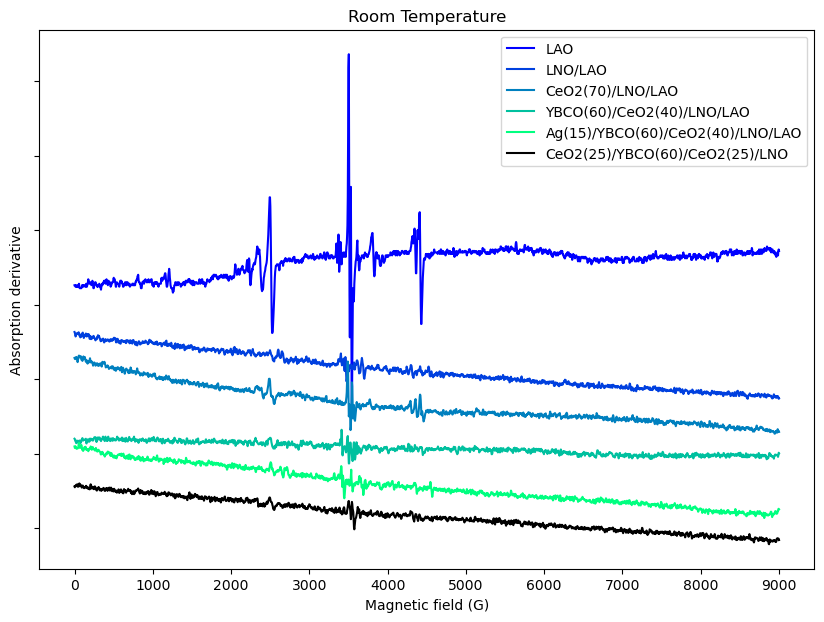

In [40]:
i=-1 #for RT
# plt.figure(figsize=(10,7))
# plt.plot(field_lao[i], int_lao[i]-23000, label="LAO", color='purple')
# plt.plot(field_21a_ag0[i], int_21a_ag0[i]+1000, label="21a Ag0: LNO", color='black')

# plt.plot(field_19a_ag0[i], int_19a_ag0[i]+800, label="19a Ag0: CeO2(70)/LNO", color='red')

# plt.plot(field_27a_ag0[i], int_27a_ag0[i]+300, label="27a Ag0: YBCO(60)/CeO2(40)/LNO", color='blue')
# plt.plot(field_27a_ag15[i], int_27a_ag15[i]+300, label="27a Ag15:    '' ", color='dodgerblue')

# plt.plot(field_25a_ag0[i], int_25a_ag0[i], label="25a Ag0: CeO2(25)/YBCO(60)/CeO2(25)/LNO", color='green')


# plt.plot(field_lao[i], int_lao[i]/np.max(int_lao), label="LAO", color='purple')
# plt.plot(field_21a_ag0[i], int_21a_ag0[i]/np.max(int_21a_ag0), label="21a Ag0: LNO", color='black')

# plt.plot(field_19a_ag0[i], int_19a_ag0[i]/np.max(int_19a_ag0), label="19a Ag0: CeO2(70)/LNO", color='red')

# plt.plot(field_27a_ag0[i], int_27a_ag0[i]/np.max(int_27a_ag0)+0.8, label="27a Ag0: YBCO(60)/CeO2(40)/LNO", color='blue')
# plt.plot(field_27a_ag15[i], int_27a_ag15[i]/np.max(int_27a_ag15)+0.8, label="27a Ag15:    '' ", color='dodgerblue')

# plt.plot(field_25a_ag0[i], int_25a_ag0[i]/np.max(int_25a_ag0)+0.8, label="25a Ag0: CeO2(25)/YBCO(60)/CeO2(25)/LNO", color='green')

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 5))
plt.figure(figsize=(10,7))
plt.plot(field_lao[i], int_lao[i]-23000, label="LAO", color=colors[0])
plt.plot(field_21a_ag0[i], int_21a_ag0[i]+1000, label="LNO/LAO", color=colors[1])

plt.plot(field_19a_ag0[i], int_19a_ag0[i]+800, label="CeO2(70)/LNO/LAO", color=colors[2])

plt.plot(field_27a_ag0[i], int_27a_ag0[i]+300, label="YBCO(60)/CeO2(40)/LNO/LAO", color=colors[3])

plt.plot(field_27a_ag15[i], int_27a_ag15[i]+300, label="Ag(15)/YBCO(60)/CeO2(40)/LNO/LAO", color=colors[4])

plt.plot(field_25a_ag0[i], int_25a_ag0[i], label="CeO2(25)/YBCO(60)/CeO2(25)/LNO", color='black')
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().set_yticklabels([])

plt.ylabel("Absorption derivative")
plt.xlabel('Magnetic field (G)')
plt.title(f"Room Temperature")
#plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.legend()
plt.savefig(save_thesis+"RT")
plt.show()


C:\Users\Costa\AppData\Local\Temp\ipykernel_21292\4185611398.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


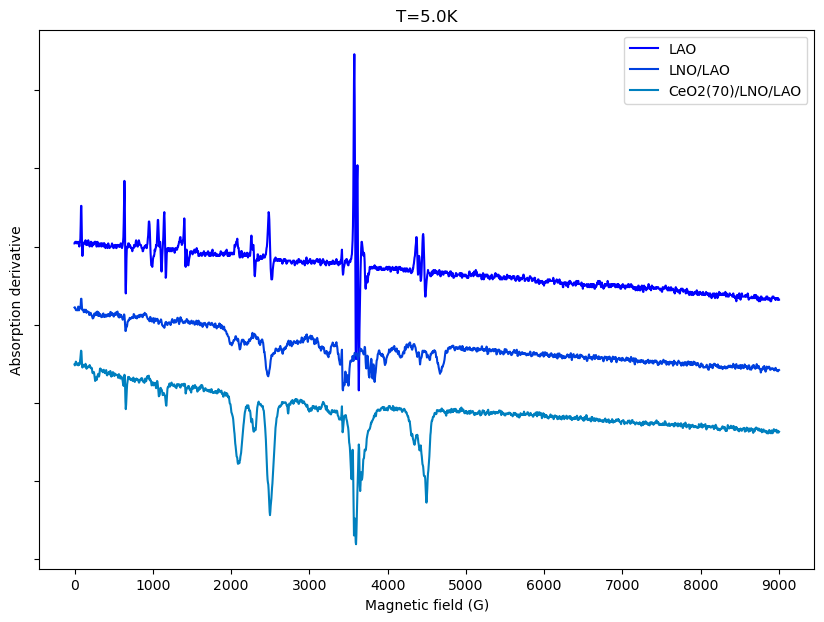

In [41]:
colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 5))
i=0
plt.figure(figsize=(10,7))
plt.plot(field_lao[i], int_lao[i]-24000, label="LAO", color=colors[0])
plt.plot(field_21a_ag0[i], int_21a_ag0[i]+300, label="LNO/LAO", color=colors[1])

plt.plot(field_19a_ag0[i], int_19a_ag0[i], label="CeO2(70)/LNO/LAO", color=colors[2])

# plt.plot(field_27a_ag0[i], int_27a_ag0[i], label="27a Ag0: YBCO(60)/CeO2(40)/LNO", color='blue')
# plt.plot(field_27a_ag15[i], int_27a_ag15[i], label="27a Ag15:    '' ", color='dodgerblue')

# plt.plot(field_25a_ag0[i], int_25a_ag0[i], label="25a Ag0: CeO2(25)/YBCO(60)/CeO2(25)/LNO", color='green')


plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
plt.gca().set_yticklabels([])

plt.ylabel("Absorption derivative")
plt.xlabel('Magnetic field (G)')
plt.title(f"T={temp_21a_ag0[i]}K")
#plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.legend()
plt.savefig(save_thesis+"5k")
plt.show()


### Tscan ALL (Ag0)

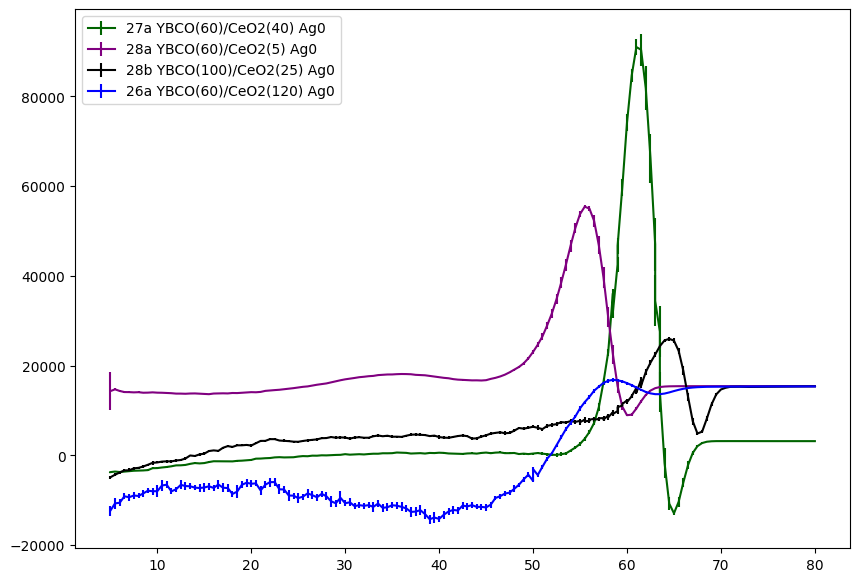

In [120]:
plt.figure(figsize=(10,7))
plt.errorbar(tscan_27a_ag0[0], tscan_27a_ag0[1], yerr=tscan_27a_ag0[2], color='darkgreen', label='27a YBCO(60)/CeO2(40) Ag0')
plt.errorbar(tscan_28a_ag0[0], tscan_28a_ag0[1], yerr=tscan_28a_ag0[2], color='purple', label='28a YBCO(60)/CeO2(5) Ag0  ')
plt.errorbar(tscan_28b_ag0[0], tscan_28b_ag0[1], yerr=tscan_28b_ag0[2], color='black', label='28b YBCO(100)/CeO2(25) Ag0')
plt.errorbar(tscan_26a_ag0[0], tscan_26a_ag0[1], yerr=tscan_26a_ag0[2], color='blue', label='26a YBCO(60)/CeO2(120) Ag0')

plt.legend()

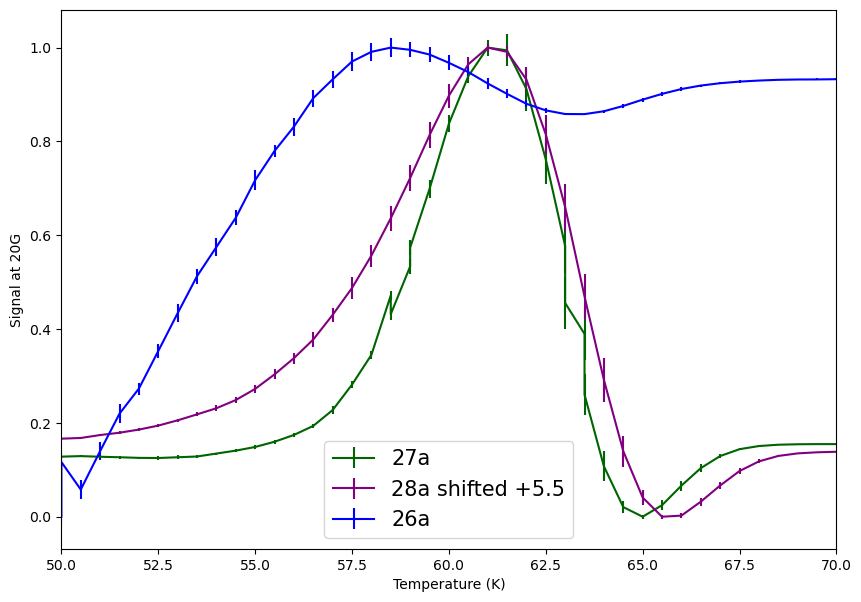

In [64]:
plt.figure(figsize=(10,7))
plt.errorbar(tscan_27a_ag0[0], (tscan_27a_ag0[1]-np.min(tscan_27a_ag0[1]))/(np.max(tscan_27a_ag0[1])-np.min(tscan_27a_ag0[1])), yerr=tscan_27a_ag0[2]/(np.max(tscan_27a_ag0[1])-np.min(tscan_27a_ag0[1])),  color='darkgreen', label='27a')
#plt.errorbar(tscan_28b_ag0[0]-3., (tscan_28b_ag0[1]-np.min(tscan_28b_ag0[1]))/(np.max(tscan_28b_ag0[1])-np.min(tscan_28b_ag0[1])), yerr=tscan_28b_ag0[2]/(np.max(tscan_28b_ag0[1])-np.min(tscan_28b_ag0[1])),  color='black', label='28b YBCO(100)/CeO2(25) Ag0')


#plt.plot(temp_24a_ag0, min_24a_ag0/np.max(min_24a_ag0), '.-', label='24a YBCO30 Ag0', color='black')
#plt.errorbar(tscan_25a_ag0[0], tscan_25a_ag0[1]/np.max(tscan_25a_ag0[1]), yerr=tscan_25a_ag0[2]/np.max(tscan_25a_ag0[1]),  color='blue', label='25a CeO2/YBCO/CeO2 Ag0')
plt.errorbar(tscan_28a_ag0[0]+5.5, (tscan_28a_ag0[1]-np.min(tscan_28a_ag0[1]))/(np.max(tscan_28a_ag0[1])-np.min(tscan_28a_ag0[1])), yerr=tscan_28a_ag0[2]/(np.max(tscan_28a_ag0[1])-np.min(tscan_28a_ag0[1])),  color='purple', label='28a shifted +5.5')

i=90
# plt.errorbar(tscan_28b_ag0[0][i:]-3.5, (tscan_28b_ag0[1][i:]-np.min(tscan_28b_ag0[1][i:]))/(np.max(tscan_28b_ag0[1][i:])-np.min(tscan_28b_ag0[1][i:])), yerr=tscan_28b_ag0[2][i:]/(np.max(tscan_28b_ag0[1][i:])-np.min(tscan_28b_ag0[1][i:])),  color='red', label='28b shifted -3.5')

i=90
plt.errorbar(tscan_26a_ag0[0][i:], (tscan_26a_ag0[1][i:]-np.min(tscan_26a_ag0[1][i:]))/(np.max(tscan_26a_ag0[1][i:])-np.min(tscan_26a_ag0[1][i:])), yerr=tscan_26a_ag0[2][i:]/(np.max(tscan_26a_ag0[1][i:])-np.min(tscan_26a_ag0[1][i:])),  color='blue', label='26a')

plt.xlim(50,70)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal at 20G")
plt.legend(fontsize=15)
plt.savefig(save_fig+"ag0 27a 28a 28b")
plt.show()

### comparison ybco all

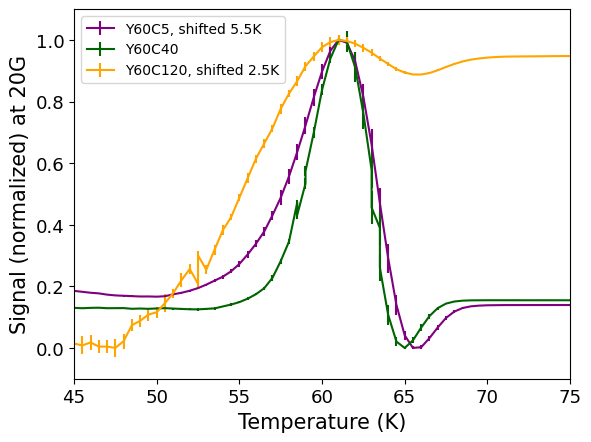

In [90]:
x_shift = -3.5
# x_28b, y_28b, yerr_28b, scale_28b = normalize_in_range(tscan_28b_ag0[0], tscan_28b_ag0[1], tscan_28b_ag0[2], x_shift)
# plt.errorbar(x_28b, y_28b, yerr=yerr_28b, color='red', label=f'Y100C25, shifted {x_shift}K')#\n Normalization factor=1/{round(scale_28b)}\n')

x_shift = 5.5
x_28a, y_28a, yerr_28a, scale_28a = normalize_in_range(tscan_28a_ag0[0], tscan_28a_ag0[1], tscan_28a_ag0[2], x_shift)
plt.errorbar(x_28a, y_28a, yerr=yerr_28a, color='purple', label=f'Y60C5, shifted {x_shift}K')#\n Normalization factor=1/{round(scale_28a)}\n')

x_27a, y_27a, yerr_27a, scale_27a = normalize_in_range(tscan_27a_ag0[0], tscan_27a_ag0[1], tscan_27a_ag0[2])
plt.errorbar(x_27a, y_27a, yerr=yerr_27a, color='darkgreen', label=f'Y60C40')#\n Normalization factor=1/{round(scale_27a)}\n')



x_shift = 2.5
x_26a, y_26a, yerr_26a, scale_26a = normalize_in_range(tscan_26a_ag0[0], tscan_26a_ag0[1], tscan_26a_ag0[2], x_shift)
plt.errorbar(x_26a, y_26a, yerr=yerr_26a, color='orange',  label=f'Y60C120, shifted {x_shift}K')#\n Normalization factor=1/{round(scale_26a)}\n')

# x_shift = 4.5
# x_24a, y_24a, yerr_24a, scale_24a = normalize_in_range(tscan_24a_ag0[0], tscan_24a_ag0[1], tscan_24a_ag0[2], x_shift)
# plt.errorbar(x_24a, y_24a, yerr=yerr_24a, color='black', label=f'Y30C55, shifted {x_shift}K')#\n Normalization factor=1/{round(scale_24a)}\n')

plt.xlim(45,75)
plt.ylim(-0.1,1.1)

plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Signal (normalized) at 20G", fontsize=15)
plt.tick_params(axis="both", which="major", labelsize=13)

plt.legend(loc='upper left')

plt.savefig(save_thesis+"ag0 ybco 60")

plt.show()

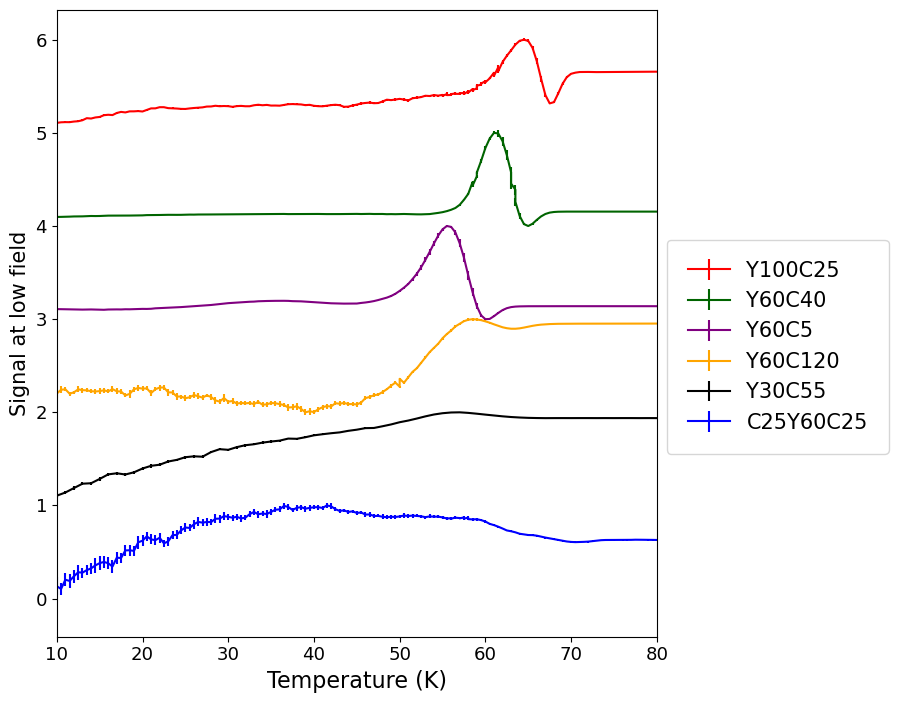

In [87]:
plt.figure(figsize=(9, 7))

# 28b YBCO100 Ag0
min_28b, max_28b = np.min(tscan_28b_ag0[1]), np.max(tscan_28b_ag0[1])
renormalization_factor_28b = max_28b - min_28b
y_28b = (tscan_28b_ag0[1] - min_28b) / renormalization_factor_28b
yerr_28b = tscan_28b_ag0[2] / renormalization_factor_28b
plt.errorbar(tscan_28b_ag0[0], y_28b+5, yerr=yerr_28b, color='red', label=f'Y100C25')#: YBCO(100)/CeO2(25)/LNO(100)/LAO 10/04\nNormalization Factor: 1/{renormalization_factor_28b:.2f}\n')


# 27a YBCO60 Ag0
min_27a, max_27a = np.min(tscan_27a_ag0[1]), np.max(tscan_27a_ag0[1])
renormalization_factor_27a = max_27a - min_27a
y_27a = (tscan_27a_ag0[1] - min_27a) / renormalization_factor_27a
yerr_27a = tscan_27a_ag0[2] / renormalization_factor_27a
plt.errorbar(tscan_27a_ag0[0], y_27a+4, yerr=yerr_27a, color='darkgreen', label=f'Y60C40')#: YBCO(60)/CeO2(40)/LNO(100)/LAO 01/04\nNormalization Factor: 1/{renormalization_factor_27a:.2f}\n')


# 28a YBCO60 Ag0
min_28a, max_28a = np.min(tscan_28a_ag0[1]), np.max(tscan_28a_ag0[1])
renormalization_factor_28a = max_28a - min_28a
y_28a = (tscan_28a_ag0[1] - min_28a) / renormalization_factor_28a
yerr_28a = tscan_28a_ag0[2] / renormalization_factor_28a
plt.errorbar(tscan_28a_ag0[0], y_28a+3, yerr=yerr_28a, color='purple', label=f'Y60C5')#: YBCO(60)/CeO2(5)/LNO(100)/LAO 09/04 \nNormalization Factor: 1/{renormalization_factor_28a:.2f}\n')

# 26a YBCO60 Ag0
min_26a, max_26a = np.min(tscan_26a_ag0[1]), np.max(tscan_26a_ag0[1])
renormalization_factor_26a = max_26a - min_26a
y_26a = (tscan_26a_ag0[1] - min_26a) / renormalization_factor_26a
yerr_26a = tscan_26a_ag0[2] / renormalization_factor_26a
plt.errorbar(tscan_26a_ag0[0], y_26a+2, yerr=yerr_26a, color='orange', label=f'Y60C120')#: YBCO(60)/CeO2(120)/LNO(100)/LAO 13/04 \nNormalization Factor: 1/{renormalization_factor_26a:.2f}\n')

# 24a YBCO30 Ag0
# min_24a, max_24a = np.min(min_24a_ag0), np.max(min_24a_ag0)
# renormalization_factor_24a = max_24a - min_24a
# y_24a = (min_24a_ag0 - min_24a) / renormalization_factor_24a
# plt.plot(temp_24a_ag0, y_24a+1, '.-', color='black', label=f'24A: YBCO(30)/CeO2(55)/LNO(100)/LAO\nNormalization Factor: 1/{renormalization_factor_24a:.2f}\n')
min_24a, max_24a = np.min(tscan_24a_ag0[1]), np.max(tscan_24a_ag0[1])
renormalization_factor_24a = max_24a - min_24a
y_24a = (tscan_24a_ag0[1] - min_24a) / renormalization_factor_24a
yerr_24a = tscan_24a_ag0[2] / renormalization_factor_24a
plt.errorbar(tscan_24a_ag0[0], y_24a+1, yerr=yerr_24a, color='black',  label=f'Y30C55')#: YBCO(30)/CeO2(55)/LNO(100)/LAO 29/04 \nNormalization Factor: 1/{renormalization_factor_24a:.2f}\n')


# 25a CeO2/YBCO/CeO2 Ag0
min_25a, max_25a = np.min(tscan_25a_ag0[1]), np.max(tscan_25a_ag0[1])
renormalization_factor_25a = max_25a - min_25a
y_25a = (tscan_25a_ag0[1] - min_25a) / renormalization_factor_25a
yerr_25a = tscan_25a_ag0[2] / renormalization_factor_25a
plt.errorbar(tscan_25a_ag0[0], y_25a, yerr=yerr_25a, color='blue', label=f'C25Y60C25')#: CeO2(25)/YBCO(60)/CeO2(25)/LNO(100)/LAO 06/04\nNormalization Factor: 1/{renormalization_factor_25a:.2f}')

plt.xlim(0, 80)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, labels, loc='upper left', bbox_to_anchor=(1, 0.65), borderpad=1, fontsize=15)
plt.tight_layout()

plt.xlim(10,80)
plt.xlabel("Temperature (K)", fontsize=16)
plt.ylabel("Signal at low field", fontsize=15)#plt.gca().set_yticklabels([])

plt.tick_params(axis="both", which="major", labelsize=13)
# plt.savefig(save_fig+"all_ag0_tscan.png", dpi=300)
plt.savefig(save_thesis+"all ag0 tscan")

plt.show()






### T=5K

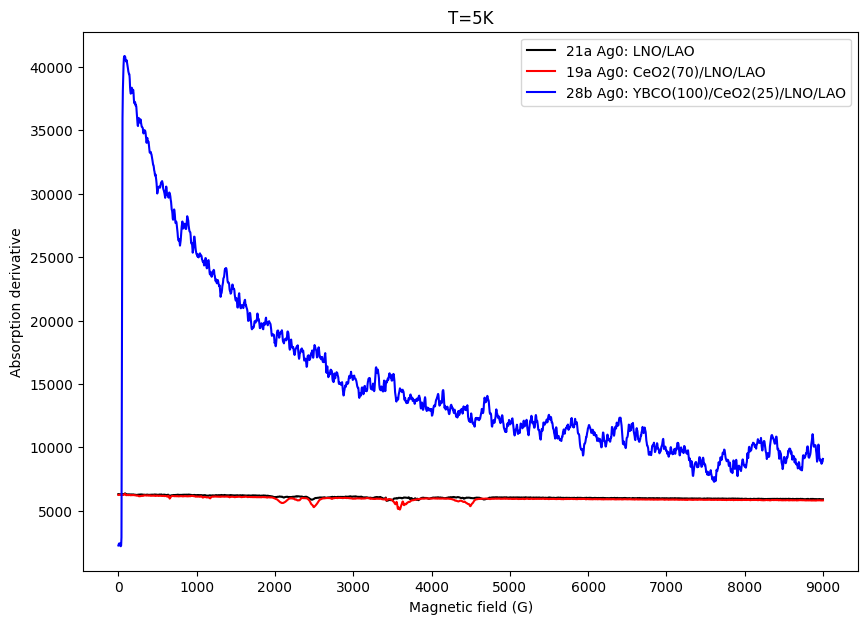

In [ ]:
T = 5.0

i=0
plt.figure(figsize=(10,7))
plt.plot(field_21a_ag0[i], int_21a_ag0[i], label="21a Ag0: LNO/LAO", color='black')

plt.plot(field_19a_ag0[i], int_19a_ag0[i], label="19a Ag0: CeO2(70)/LNO/LAO", color='red')

plt.plot(field_28b_ag0[2], int_28b_ag0[2], label="28b Ag0: YBCO(100)/CeO2(25)/LNO/LAO", color='blue')
#plt.plot(field_27a_ag15[i], int_27a_ag15[i], label="27a Ag15:    '' ", color='dodgerblue')

#plt.plot(field_25a_ag0[i], int_25a_ag0[i], label="25a Ag0: CeO2(25)/YBCO(60)/CeO2(25)/LNO", color='green')

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
#plt.gca().set_yticklabels([])

plt.ylabel("Absorption derivative")
plt.xlabel('Magnetic field (G)')
plt.title(f"T=5K")
#plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
plt.legend()
plt.savefig(save_fig+"5K")
plt.show()


    

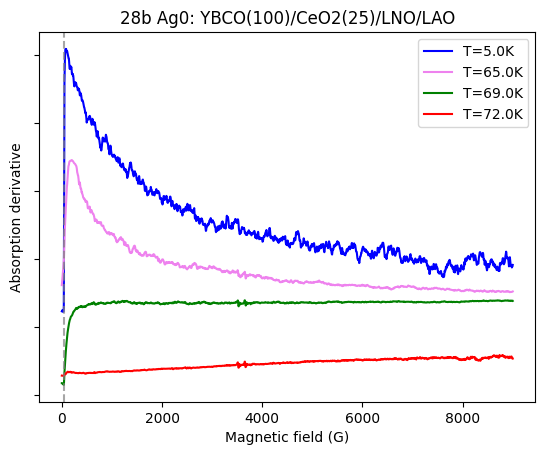

In [153]:
T = 5.0
i = np.where(temp_28b_ag0 == T)[0][0]
plt.plot(field_28b_ag0[i], int_28b_ag0[i], label=f"T={T}K", color='blue')

T = 65.0
i = np.where(temp_28b_ag0 == T)[0][0]
plt.plot(field_28b_ag0[i], int_28b_ag0[i]+1000, label=f"T={T}K", color='violet')

T = 69.0
i = np.where(temp_28b_ag0 == T)[0][0]
plt.plot(field_28b_ag0[i], int_28b_ag0[i]+1000, label=f"T={T}K", color='green')

T = 72.0
i = np.where(temp_28b_ag0 == T)[0][0]
plt.plot(field_28b_ag0[i], int_28b_ag0[i]-9000, label=f"T={T}K", color='red')

plt.axvline(40, linestyle='--', color='grey', alpha=0.7)
plt.ylabel("Absorption derivative")
plt.xlabel('Magnetic field (G)')
plt.gca().set_yticklabels([])
plt.title("28b Ag0: YBCO(100)/CeO2(25)/LNO/LAO")
#plt.xlim(0,300)
plt.legend()
plt.savefig(save_fig+"28b critical field")
plt.show()

### 28b Tscan Ag all

scale 30866.3671875
ag5
scale 67223.2421875
ag10
scale 25605.0390625
ag15
scale 39478.80859375


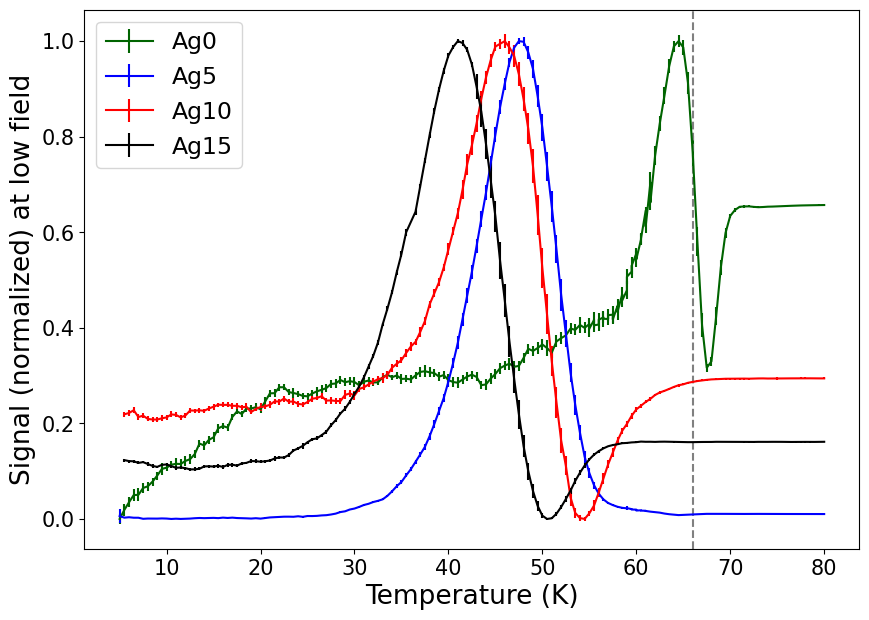

In [168]:
plt.figure(figsize=(10,7))
# print("ag0")
y1, yerr1 = normalize(tscan_28b_ag0[1], tscan_28b_ag0[2])
plt.errorbar(tscan_28b_ag0[0], y1, yerr=yerr1,color='darkgreen', label="Ag0")#-Y100C25, 10/04") # label='27a YBCO60 Ag0 01/04')

print("ag5")
y1, yerr1 = normalize(tscan_28b_ag5[1], tscan_28b_ag5[2])
plt.errorbar(tscan_28b_ag5[0], y1, yerr=yerr1,color='blue', label="Ag5")#-Y60C40, 16/04") # label='27a YBCO60 Ag0 01/04')

print("ag10")
y1, yerr1 = normalize(tscan_28b_ag10[1], tscan_28b_ag10[2])
plt.errorbar(tscan_28b_ag10[0][1:], y1[1:], yerr=yerr1[1:],color='red', label="Ag10")#-Y60C40, 16/04")

print("ag15")
y1, yerr1 = normalize(tscan_28b_ag15_check[1], tscan_28b_ag15_check[2])
plt.errorbar(tscan_28b_ag15_check[0][1:], y1[1:], yerr=yerr1[1:],color='black', label="Ag15")#-Y60C40, 16/04")

# print(np.max(tscan_27a_ag0[1]))
# print(np.max(tscan_27a_ag15[1]))
# plt.xlim(57,73)
# plt.ylim(-0.01,0.03)
# plt.axvline(61.0)
#plt.axvline(60.5)

# plt.title("Y100C25", fontsize=19)
plt.xlabel("Temperature (K)",fontsize=19)
plt.ylabel("Signal (normalized) at low field", fontsize=19)#plt.gca().set_yticklabels([])
plt.axvline(66, linestyle='--', color='grey')
plt.legend(fontsize=17, loc="upper left")
plt.tick_params(axis="both", which="major", labelsize=15)
plt.savefig(save_thesis+"28b ag all")
# plt.savefig(save_thesis+"28b ag 5")

plt.show()

25955.13671875
33640.68359375
82086.46484375
51680.87890625
48532.5390625


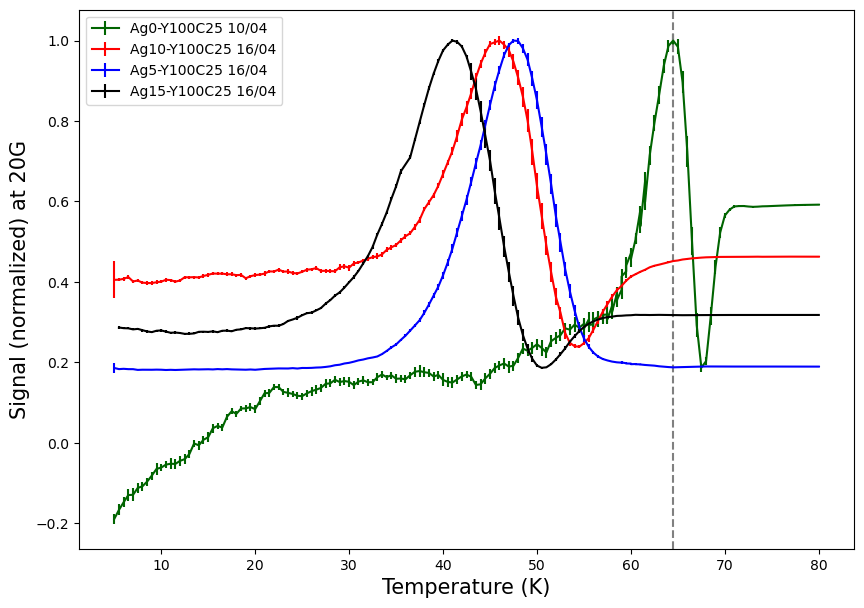

In [98]:
plt.figure(figsize=(10,7))
plt.errorbar(tscan_28b_ag0[0], tscan_28b_ag0[1]/np.max(tscan_28b_ag0[1]), yerr=tscan_28b_ag0[2]/np.max(tscan_28b_ag0[1]),  color='darkgreen', label="Ag0-Y100C25 10/04")#'28b YBCO100 Ag0 10/04')
plt.errorbar(tscan_28b_ag10[0], tscan_28b_ag10[1]/np.max(tscan_28b_ag10[1]), yerr=tscan_28b_ag10[2]/np.max(tscan_28b_ag10[1]),  color='red', label="Ag10-Y100C25 16/04")#'28b YBCO100 Ag10 16/04')
plt.errorbar(tscan_28b_ag5[0], tscan_28b_ag5[1]/np.max(tscan_28b_ag5[1]), yerr=tscan_28b_ag5[2]/np.max(tscan_28b_ag5[1]),  color='blue', label="Ag5-Y100C25 16/04")#'28b YBCO100 Ag5 16/04')

# plt.plot(temp_28b_ag15, min_28b_ag15/np.max(min_28b_ag15), '.-', label='28b YBCO100 Ag15 26/03', color='grey', alpha=0.5)

# plt.errorbar(tscan_28b_ag15_inplane[0][1:], tscan_28b_ag15_inplane[1][1:]/np.max(tscan_28b_ag15_inplane[1]), yerr=tscan_28b_ag15_inplane[2][1:]/np.max(tscan_28b_ag15_inplane[1]),  color='green', label='28b YBCO100 Ag15 inplane 16/04')


# plt.errorbar(tscan_28b_ag15[0][1:], tscan_28b_ag15[1][1:]/np.max(tscan_28b_ag15[1]), yerr=tscan_28b_ag15[2][1:]/np.max(tscan_28b_ag15[1]),  color='black', label='28b YBCO100 Ag15 10/04')

plt.errorbar(tscan_28b_ag15_check[0][1:], tscan_28b_ag15_check[1][1:]/np.max(tscan_28b_ag15_check[1]), yerr=tscan_28b_ag15_check[2][1:]/np.max(tscan_28b_ag15_check[1]),  color='black', label="Ag15-Y100C25 16/04")#'28b YBCO100 Ag15 check 16/04')


# plt.ylim(0.8,1.01)
# plt.xlim(0,80)
# plt.axvline(25)
# plt.axvline(65)
plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Signal (normalized) at 20G", fontsize=15)#plt.gca().set_yticklabels([])
plt.axvline(64.5, linestyle='--', color='grey')
print(np.max(tscan_28b_ag0[1]))
print(np.max(tscan_28b_ag10[1]))
print(np.max(tscan_28b_ag5[1]))
print(np.max(tscan_28b_ag15[1]))
print(np.max(tscan_28b_ag15_check[1]))

plt.legend()
plt.savefig(save_fig+"28b, ag all")
plt.show()



C:\Users\Costa\AppData\Local\Temp\ipykernel_2540\3586949157.py:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


days:6
diff max T = 5.0
diff min T = 4.0
days:13
diff max T = 8.0
diff min T = 5.5
25955.13671875
51680.87890625


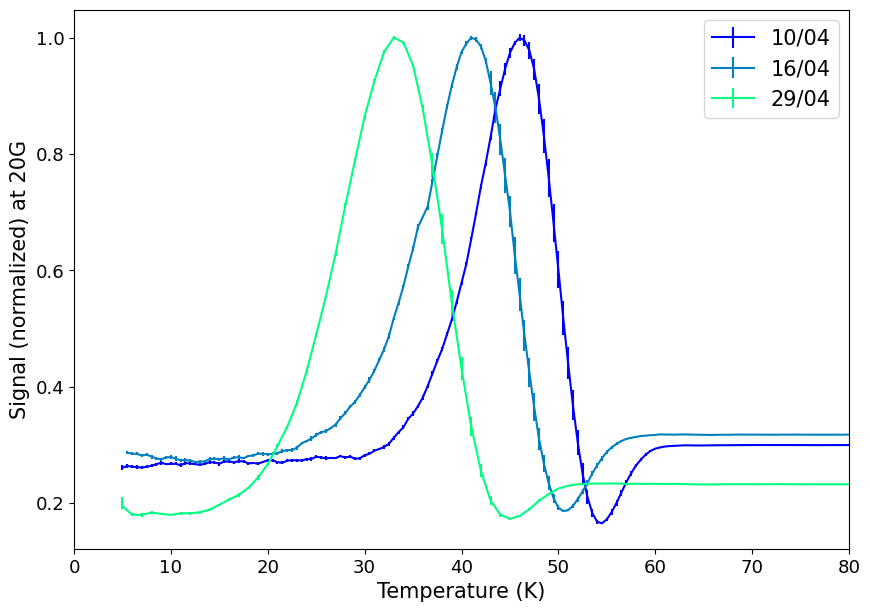

In [139]:
plt.figure(figsize=(10,7))
# plt.errorbar(tscan_28b_ag0[0], tscan_28b_ag0[1]/np.max(tscan_28b_ag0[1]), yerr=tscan_28b_ag0[2]/np.max(tscan_28b_ag0[1]),  color='darkgreen', label='28b YBCO100 Ag0')
# plt.errorbar(tscan_28b_ag10[0], tscan_28b_ag10[1]/np.max(tscan_28b_ag10[1]), yerr=tscan_28b_ag10[2]/np.max(tscan_28b_ag10[1]),  color='red', label='28b YBCO100 Ag10')
# plt.errorbar(tscan_28b_ag5[0], tscan_28b_ag5[1]/np.max(tscan_28b_ag5[1]), yerr=tscan_28b_ag5[2]/np.max(tscan_28b_ag5[1]),  color='blue', label='28b YBCO100 Ag5')

# plt.plot(temp_28b_ag15, min_28b_ag15/np.max(min_28b_ag15), '.-', label='28b YBCO100 Ag15 26/03', color='grey', alpha=0.5)

# plt.errorbar(tscan_28b_ag15_inplane[0][1:], tscan_28b_ag15_inplane[1][1:]/np.max(tscan_28b_ag15_inplane[1]), yerr=tscan_28b_ag15_inplane[2][1:]/np.max(tscan_28b_ag15_inplane[1]),  color='green', label='28b YBCO100 Ag15 inplane 16/04')

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 3))

plt.errorbar(tscan_28b_ag15[0][1:], tscan_28b_ag15[1][1:]/np.max(tscan_28b_ag15[1]), yerr=tscan_28b_ag15[2][1:]/np.max(tscan_28b_ag15[1]),  color=colors[0], label='10/04')
index = np.argmax(tscan_28b_ag15[1][1:])
# plt.axvline(tscan_28b_ag15[0][index+1], color='black', alpha=0.5)
maxT_1 = tscan_28b_ag15[0][index+1]

index = np.argmin(tscan_28b_ag15[1][1:])
# plt.axvline(tscan_28b_ag15[0][index+1], color='black', alpha=0.5)
minT_1 = tscan_28b_ag15[0][index+1]

plt.errorbar(tscan_28b_ag15_check[0][1:], tscan_28b_ag15_check[1][1:]/np.max(tscan_28b_ag15_check[1]), yerr=tscan_28b_ag15_check[2][1:]/np.max(tscan_28b_ag15_check[1]),  color=colors[1], label='16/04')
index = np.argmax(tscan_28b_ag15_check[1][1:])
# plt.axvline(tscan_28b_ag15_check[0][index+1], color='orange', alpha=0.5)
maxT_2 = tscan_28b_ag15_check[0][index+1]

index = np.argmin(tscan_28b_ag15_check[1][1:])
# plt.axvline(tscan_28b_ag15_check[0][index+1], color='orange', alpha=0.5)
minT_2 = tscan_28b_ag15_check[0][index+1]

plt.errorbar(tscan_28b_ag15_2904[0], tscan_28b_ag15_2904[1]/np.max(tscan_28b_ag15_2904[1]), yerr=tscan_28b_ag15_2904[2]/np.max(tscan_28b_ag15_2904[1]),  color=colors[2], label='29/04')
# plt.errorbar(tscan_28b_ag15_2904_in[0], tscan_28b_ag15_2904_in[1]/np.max(tscan_28b_ag15_2904_in[1]), yerr=tscan_28b_ag15_2904_in[2]/np.max(tscan_28b_ag15_2904_in[1]),  color='green', label='28b YBCO100 Ag15 inplane 29/04')

index = np.argmax(tscan_28b_ag15_2904[1][1:])
# plt.axvline(tscan_28b_ag15_2904[0][index+1], color='orange', alpha=0.5)
maxT_3 = tscan_28b_ag15_2904[0][index+1]

index = np.argmin(tscan_28b_ag15_2904[1][1:])
# plt.axvline(tscan_28b_ag15_2904[0][index+1], color='orange', alpha=0.5)
minT_3 = tscan_28b_ag15_2904[0][index+1]


print(f'days:{6}')
print(f'diff max T = {maxT_1 - maxT_2}')
print(f'diff min T = {minT_1 - minT_2}')

print(f'days:{13}')
print(f'diff max T = {maxT_2 - maxT_3}')
print(f'diff min T = {minT_2 - minT_3}')


# plt.ylim(0.8,1.01)
plt.xlim(0,80)
# plt.axvline(25)
# plt.axvline(65)
plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Signal (normalized) at 20G", fontsize=15)#plt.gca().set_yticklabels([])
# plt.axvline(66, linestyle='--', color='grey')
print(np.max(tscan_28b_ag0[1]))
print(np.max(tscan_28b_ag15[1]))
plt.tick_params(axis="both", which="major", labelsize=13)
plt.legend(fontsize=15)
plt.savefig(save_thesis+"28b degradation")
plt.show()



25955.13671875
51680.87890625


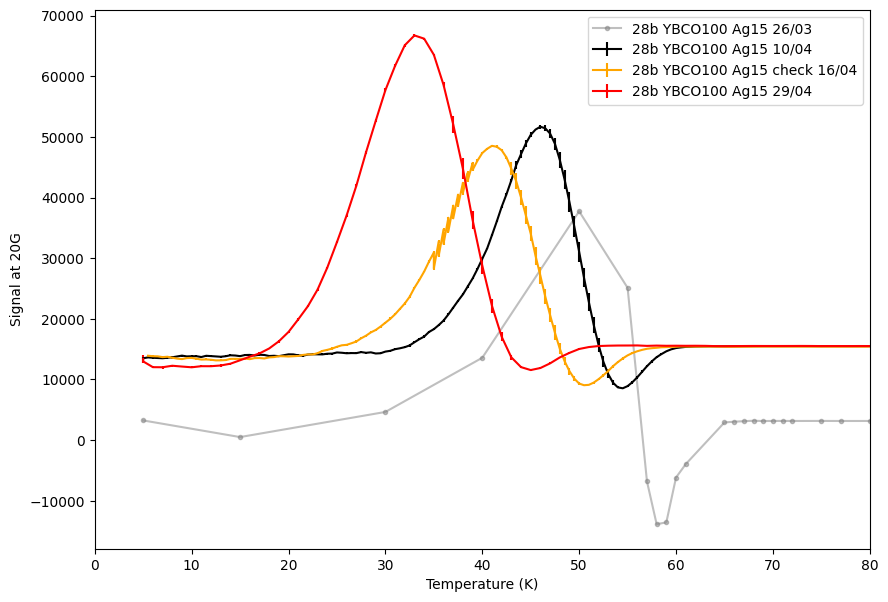

In [16]:
plt.figure(figsize=(10,7))


plt.plot(temp_28b_ag15, min_28b_ag15, '.-', label='28b YBCO100 Ag15 26/03', color='grey', alpha=0.5)


plt.errorbar(tscan_28b_ag15[0][1:], tscan_28b_ag15[1][1:], yerr=tscan_28b_ag15[2][1:],  color='black', label='28b YBCO100 Ag15 10/04')

plt.errorbar(tscan_28b_ag15_check[0][1:], tscan_28b_ag15_check[1][1:], yerr=tscan_28b_ag15_check[2][1:],  color='orange', label='28b YBCO100 Ag15 check 16/04')

plt.errorbar(tscan_28b_ag15_2904[0], tscan_28b_ag15_2904[1], yerr=tscan_28b_ag15_2904[2],  color='red', label='28b YBCO100 Ag15 29/04')




# plt.ylim(0.8,1.01)
plt.xlim(0,80)
# plt.axvline(25)
# plt.axvline(65)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal at 20G")#plt.gca().set_yticklabels([])
# plt.axvline(66, linestyle='--', color='grey')
print(np.max(tscan_28b_ag0[1]))
print(np.max(tscan_28b_ag15[1]))

plt.legend()
plt.savefig(save_fig+"28b, ag all")
plt.show()



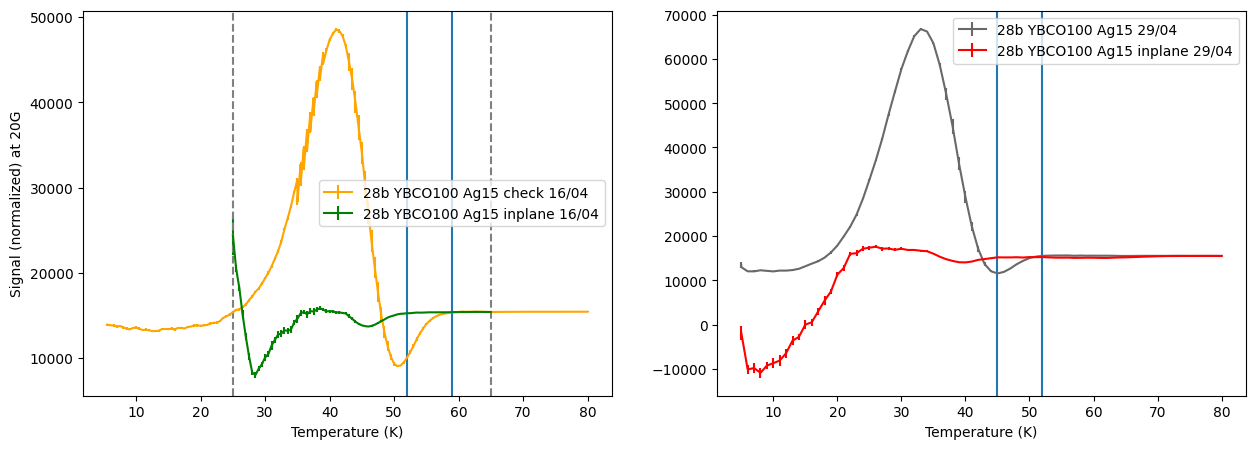

In [29]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

ax1.errorbar(tscan_28b_ag15_check[0][1:], tscan_28b_ag15_check[1][1:], yerr=tscan_28b_ag15_check[2][1:],  color='orange', label='28b YBCO100 Ag15 check 16/04')
ax1.errorbar(tscan_28b_ag15_inplane[0][1:], tscan_28b_ag15_inplane[1][1:], yerr=tscan_28b_ag15_inplane[2][1:],  color='green', label='28b YBCO100 Ag15 inplane 16/04')

ax2.errorbar(tscan_28b_ag15_2904[0], tscan_28b_ag15_2904[1], yerr=tscan_28b_ag15_2904[2],  color='dimgrey', label='28b YBCO100 Ag15 29/04')
ax2.errorbar(tscan_28b_ag15_2904_in[0], tscan_28b_ag15_2904_in[1], yerr=tscan_28b_ag15_2904_in[2],  color='red', label='28b YBCO100 Ag15 inplane 29/04')


# plt.ylim(0.8,1.01)
ax1.axvline(25, linestyle='--', color='grey')
ax1.axvline(65, linestyle='--', color='grey')
ax1.set_xlabel("Temperature (K)")
ax2.set_xlabel("Temperature (K)")
ax1.set_ylabel("Signal (normalized) at 20G")#plt.gca().set_yticklabels([])
# plt.axvline(66, linestyle='--', color='grey')
# ax2.set_xlim(25,55)
ax2.axvline(52)
ax2.axvline(45)

ax1.axvline(52)
ax1.axvline(59)


ax1.legend()
ax2.legend()
plt.savefig(save_fig+"28b, ag15 inplane and outofplane")
plt.show()



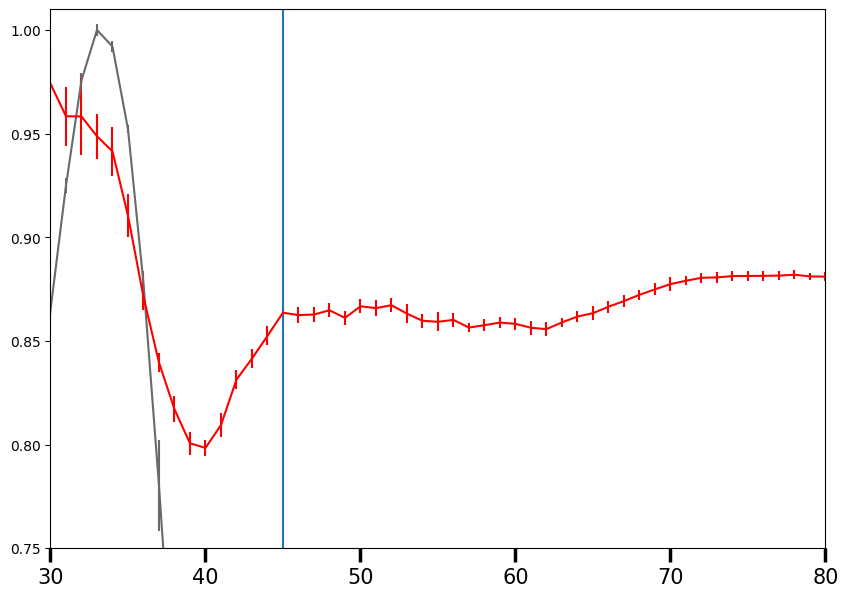

In [30]:
plt.figure(figsize=(10,7))

plt.errorbar(tscan_28b_ag15_2904[0], tscan_28b_ag15_2904[1]/np.max(tscan_28b_ag15_2904[1]), yerr=tscan_28b_ag15_2904[2]/np.max(tscan_28b_ag15_2904[1]),  color='dimgrey', label='28b YBCO100 Ag15 29/04')
plt.errorbar(tscan_28b_ag15_2904_in[0], tscan_28b_ag15_2904_in[1]/np.max(tscan_28b_ag15_2904_in[1]), yerr=tscan_28b_ag15_2904_in[2]/np.max(tscan_28b_ag15_2904_in[1]),  color='red', label='28b YBCO100 Ag15 inplane 29/04')

plt.ylim(0.75,1.01)
plt.xlim(30,80)
plt.tick_params(axis='x', which='major', labelsize=15, width=2.5, length=10)

plt.axvline(45)

plt.savefig(save_fig+"28b, ag15 inplane ")


days:6
diff max T = 5.0
diff min T = 4.0
25955.13671875
51680.87890625


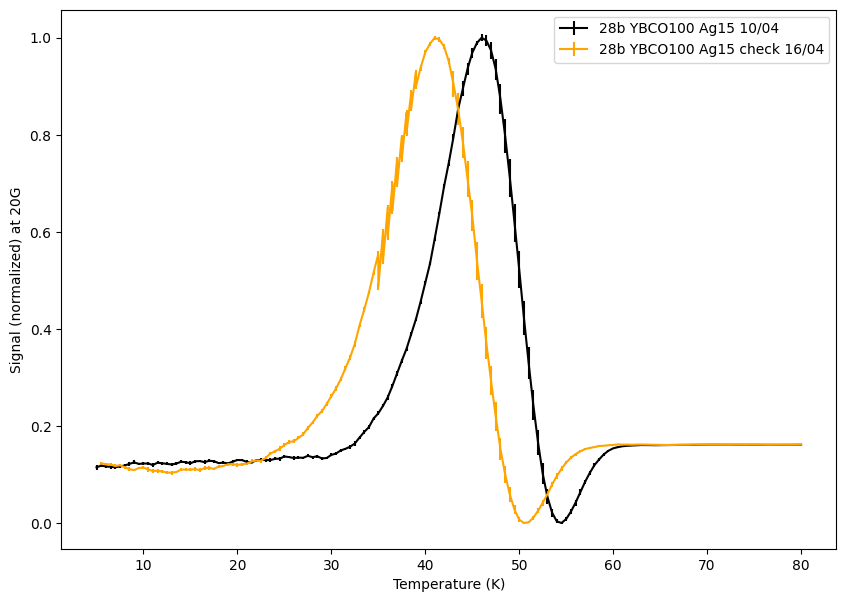

In [162]:
plt.figure(figsize=(10,7))

y, yerr = normalize(tscan_28b_ag15[1][1:], tscan_28b_ag15[2][1:])
plt.errorbar(tscan_28b_ag15[0][1:], y, yerr=yerr, color='black', label='28b YBCO100 Ag15 10/04')
index = np.argmax(tscan_28b_ag15[1][1:])
# plt.axvline(tscan_28b_ag15[0][index+1], color='black', alpha=0.5)
maxT_1 = tscan_28b_ag15[0][index+1]

index = np.argmin(tscan_28b_ag15[1][1:])
# plt.axvline(tscan_28b_ag15[0][index+1], color='black', alpha=0.5)
minT_1 = tscan_28b_ag15[0][index+1]

y, yerr = normalize(tscan_28b_ag15_check[1][1:], tscan_28b_ag15_check[2][1:])
plt.errorbar(tscan_28b_ag15_check[0][1:], y, yerr=yerr, color='orange', label='28b YBCO100 Ag15 check 16/04')
index = np.argmax(tscan_28b_ag15_check[1][1:])
# plt.axvline(tscan_28b_ag15_check[0][index+1], color='orange', alpha=0.5)
maxT_2 = tscan_28b_ag15_check[0][index+1]

index = np.argmin(tscan_28b_ag15_check[1][1:])
# plt.axvline(tscan_28b_ag15_check[0][index+1], color='orange', alpha=0.5)
minT_2 = tscan_28b_ag15_check[0][index+1]

print(f'days:{6}')
print(f'diff max T = {maxT_1 - maxT_2}')
print(f'diff min T = {minT_1 - minT_2}')


# plt.ylim(0.0, 0.2)
# plt.xlim(50.,80.)
# plt.axvline(25)
# plt.axvline(65)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")#plt.gca().set_yticklabels([])
# plt.axvline(66, linestyle='--', color='grey')
print(np.max(tscan_28b_ag0[1]))
print(np.max(tscan_28b_ag15[1]))

plt.legend()
plt.savefig(save_fig+"28b, ag all")
plt.show()



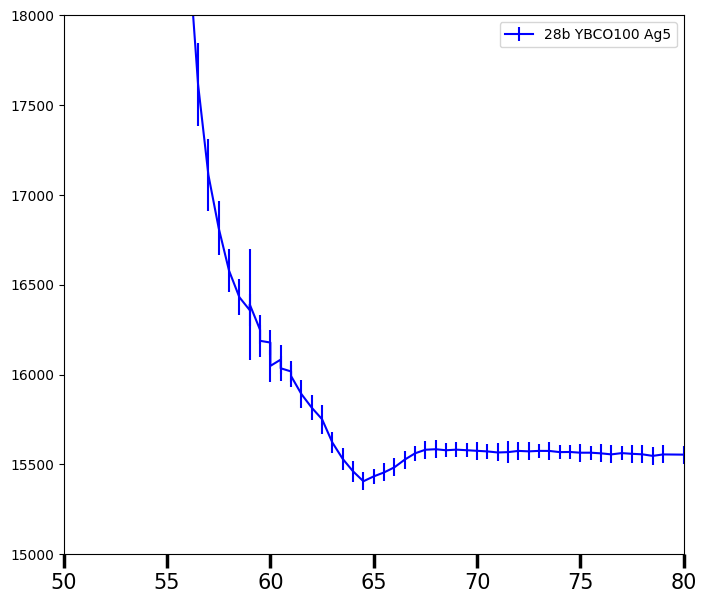

In [98]:
plt.figure(figsize=(8,7))
# plt.errorbar(tscan_28b_ag0[0], tscan_28b_ag0[1], yerr=tscan_28b_ag0[2]/np.max(tscan_28b_ag0[1]),  color='darkgreen', label='28b YBCO100 Ag0')
# plt.errorbar(tscan_28b_ag15[0][1:], tscan_28b_ag15[1][1:], yerr=tscan_28b_ag15[2][1:]/np.max(tscan_28b_ag15[1]),  color='black', label='28b YBCO100 Ag15 ??')
# plt.errorbar(tscan_28b_ag10[0], tscan_28b_ag10[1], yerr=tscan_28b_ag10[2],  color='red', label='28b YBCO100 Ag10')
plt.errorbar(tscan_28b_ag5[0], tscan_28b_ag5[1], yerr=tscan_28b_ag5[2],  color='blue', label='28b YBCO100 Ag5')
# plt.errorbar(tscan_28b_ag15_check[0][1:], tscan_28b_ag15_check[1][1:], yerr=tscan_28b_ag15_check[2][1:],  color='orange', label='28b YBCO100 Ag15 check')
plt.ylim(15000,18000)
plt.xlim(50,80)
plt.tick_params(axis='x', which='major', labelsize=15, width=2.5, length=10)
plt.legend()
plt.savefig(save_fig+"28b, ag 5")
plt.show()


### 28b other comparison

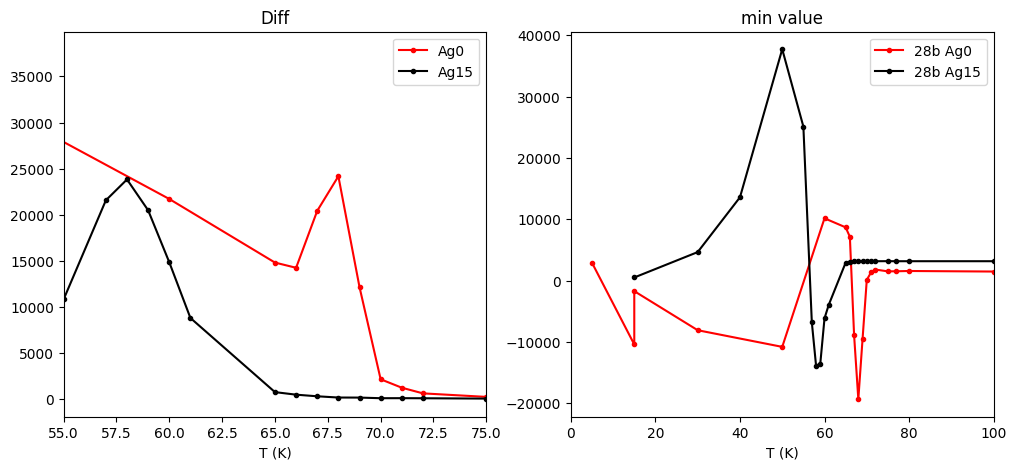

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(temp_28b_ag0, diff_28b_ag0, '.-', label='Ag0', color='red')
ax1.plot(temp_28b_ag15[1:], diff_28b_ag15[1:], '.-', label='Ag15', color='black')
ax1.set_xlim(55,75)

ax1.set_xlabel("T (K)")
ax1.set_title("Diff")
ax1.legend()

ax2.plot(temp_28b_ag0, min_28b_ag0, '.-', label='28b Ag0', color='red')
ax2.plot(temp_28b_ag15[1:], min_28b_ag15[1:], '.-', label='28b Ag15', color='black')
ax2.set_xlim(0,100)

ax2.set_xlabel("T (K)")
ax2.set_title("min value")
ax2.legend()


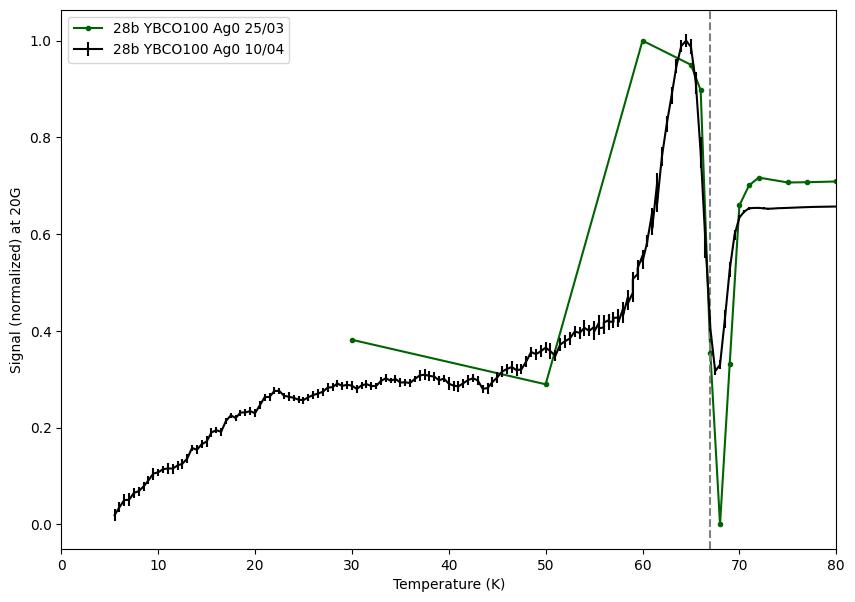

In [139]:
#j = np.where(temp_28b_ag15 == 60.0)[0][0]
#print(j)
#temp_28b_ag15 = np.delete(temp_28b_ag15, 11)
#min_28b_ag15 = np.delete(min_28b_ag15, 11)
plt.figure(figsize=(10,7))
plt.plot(temp_28b_ag0[3:], (min_28b_ag0[3:]-np.min(min_28b_ag0[3:]))/(np.max(min_28b_ag0[3:])-np.min(min_28b_ag0[3:])), '.-', label='28b YBCO100 Ag0 25/03', color='darkgreen')
#plt.plot(temp_28b_ag15, min_28b_ag15/np.max(min_28b_ag15), '.-', label='28b YBCO100 Ag15', color='black')
plt.errorbar(tscan_28b_ag0[0][1:], (tscan_28b_ag0[1][1:]-np.min(tscan_28b_ag0[1]))/(np.max(tscan_28b_ag0[1])-np.min(tscan_28b_ag0[1])), yerr=tscan_28b_ag0[2][1:]/(np.max(tscan_28b_ag0[1])-np.min(tscan_28b_ag0[1])),  color='black', label='28b YBCO100 Ag0 10/04')

# plt.axvline(61, linestyle='--')
# plt.axvline(75, linestyle='--')
plt.axvline(67, linestyle='--', color='grey')


plt.xlim(0,80)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
#plt.gca().set_yticklabels([])
plt.legend()
plt.savefig(save_fig+"28b, ag0 comparison")

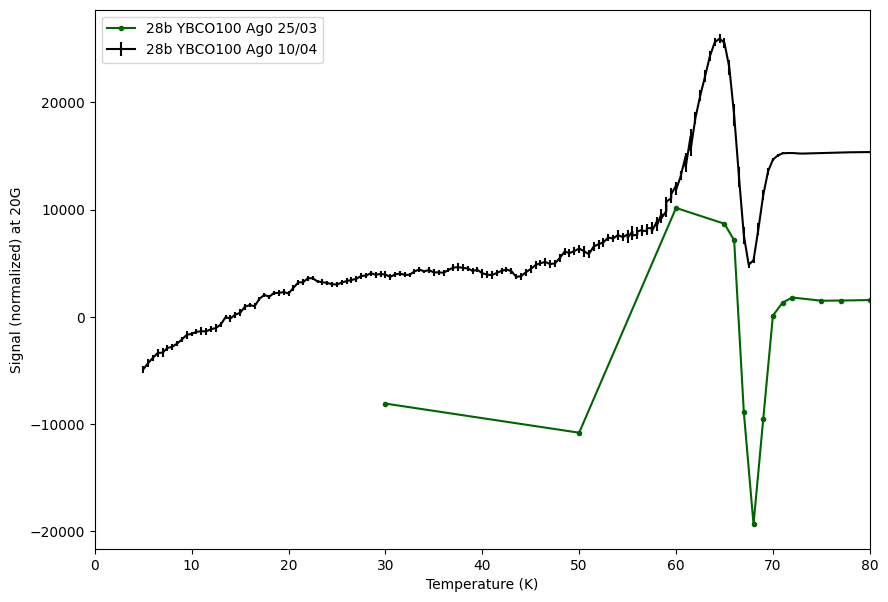

In [138]:
#j = np.where(temp_28b_ag15 == 60.0)[0][0]
#print(j)
#temp_28b_ag15 = np.delete(temp_28b_ag15, 11)
#min_28b_ag15 = np.delete(min_28b_ag15, 11)
plt.figure(figsize=(10,7))
plt.plot(temp_28b_ag0[3:], min_28b_ag0[3:], '.-', label='28b YBCO100 Ag0 25/03', color='darkgreen')
#plt.plot(temp_28b_ag15, min_28b_ag15/np.max(min_28b_ag15), '.-', label='28b YBCO100 Ag15', color='black')
plt.errorbar(tscan_28b_ag0[0], tscan_28b_ag0[1], yerr=tscan_28b_ag0[2],  color='black', label='28b YBCO100 Ag0 10/04')

#plt.axvline(61, linestyle='--')
#plt.axvline(75, linestyle='--')

plt.xlim(0,80)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
#plt.gca().set_yticklabels([])
plt.legend()
#plt.savefig(save_fig+"28b, ag0 vs ag15")#

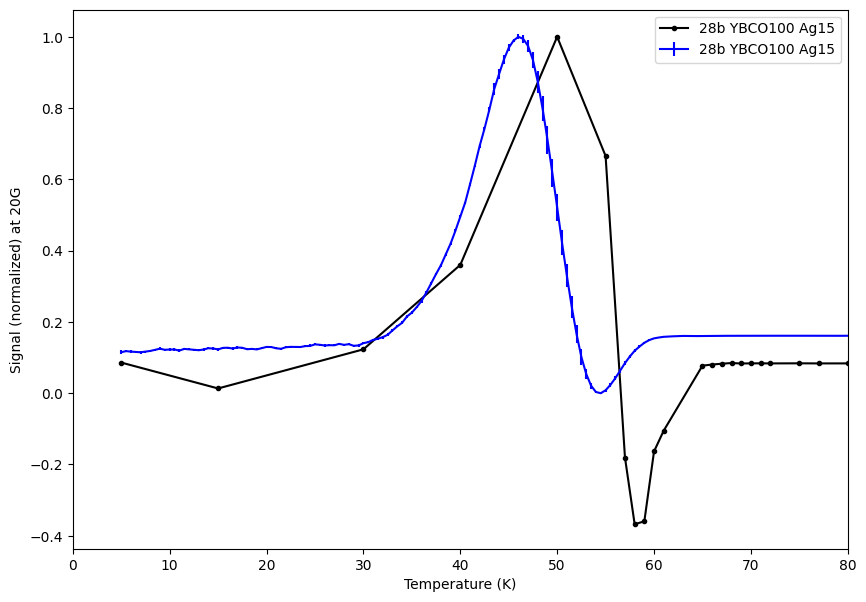

In [10]:
#j = np.where(temp_28b_ag15 == 60.0)[0][0]
#print(j)
#temp_28b_ag15 = np.delete(temp_28b_ag15, 11)
#min_28b_ag15 = np.delete(min_28b_ag15, 11)
plt.figure(figsize=(10,7))
plt.plot(temp_28b_ag15, min_28b_ag15/np.max(min_28b_ag15), '.-', label='28b YBCO100 Ag15', color='black')
plt.errorbar(tscan_28b_ag15[0][1:], (tscan_28b_ag15[1][1:]-np.min(tscan_28b_ag15[1]))/(np.max(tscan_28b_ag15[1])-np.min(tscan_28b_ag15[1])), yerr=tscan_28b_ag15[2][1:]/(np.max(tscan_28b_ag15[1])-np.min(tscan_28b_ag15[1])),  color='blue', label='28b YBCO100 Ag15')



plt.xlim(0,80)
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
#plt.gca().set_yticklabels([])
plt.legend()
#plt.savefig(save_fig+"28b, ag0 vs ag15")

j=10-->T=70.0
i=17-->T=70.0


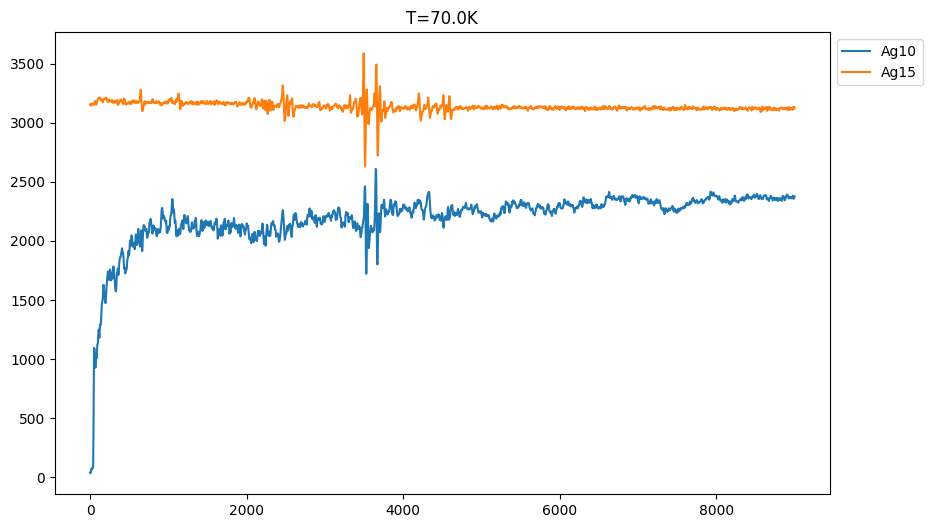

In [17]:
T = 70.0
j = np.where(temp_28b_ag0 == 70.0)[0][0]
i = np.where(temp_28b_ag15 == 70.0)[0][0]
print(f"j={j}-->T={temp_28b_ag0[j]}")
print(f"i={i}-->T={temp_28b_ag15[i]}")


plt.figure(figsize=(10,6))
plt.plot(field_28b_ag0[j], int_28b_ag0[j], label="Ag10")
plt.plot(field_28b_ag15[i], int_28b_ag15[i], label="Ag15")

plt.title(f"T={T}K")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(0,80)
plt.show()
    

### 28b vs 24a,  Ag0

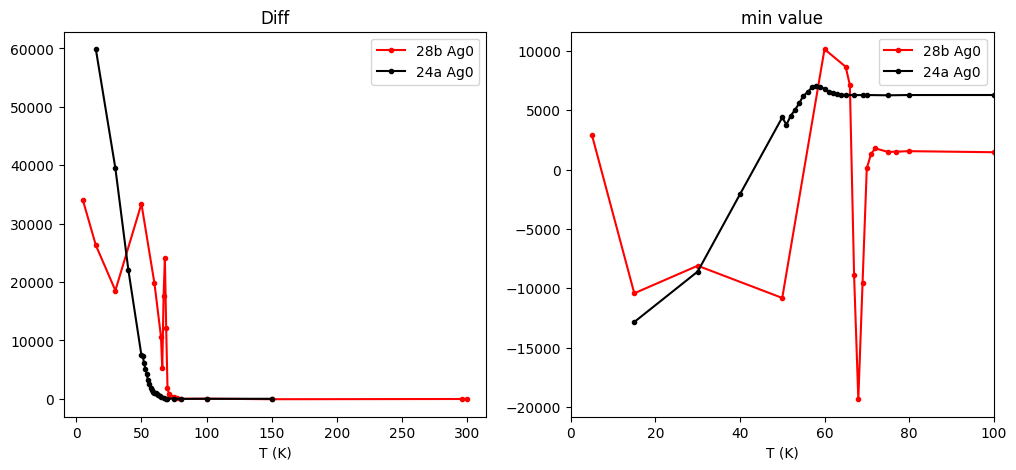

In [110]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(temp_28b_ag0, diff_28b_ag0, '.-', label='28b Ag0', color='red')
ax1.plot(temp_24a_ag0[1:], diff_24a_ag0[1:], '.-', label='24a Ag0', color='black')
#ax1.plot(temp_28b_ag15[1:], diff_28b_ag15[1:], '.-', label='28b Ag15', color='blue')
#ax1.plot(temp_24a_ag15, diff_24a_ag15, '.-', label='24a Ag15', color='green')
#ax1.plot(temp_data2[1:], diff_data2[1:], '+', label='24a Ag15', color='darkgreen')

#ax1.set_xlim(0,160)
#ax1.set_ylim(-100,3000)

ax1.set_xlabel("T (K)")
ax1.set_title("Diff")
ax1.legend()

ax2.plot(temp_28b_ag0, min_28b_ag0, '.-', label='28b Ag0', color='red')
ax2.plot(temp_24a_ag0[1:], min_24a_ag0[1:], '.-', label='24a Ag0', color='black')
#ax2.plot(temp_28b_ag15[1:], min_28b_ag15[1:], '.-', label='28b Ag15', color='blue')
#ax2.plot(temp_24a_ag15, min_24a_ag15, '.-', label='24a Ag15', color='green')
#ax2.plot(temp_data2[1:], min_data2[1:], '+', label='24a Ag15', color='darkgreen')

ax2.set_xlim(0,100)
#ax2.set_ylim(0,10000)

ax2.set_xlabel("T (K)")
ax2.set_title("min value")
ax2.legend()


In [9]:

T = 65.0
j = np.where(temp_28b_ag0 == T)[0][0]
i = np.where(temp_24a_ag0 == T)[0][0]
print(f"j={j}-->T={temp_28b_ag0[j]}")
print(f"i={i}-->T={temp_24a_ag0[i]}")

#j=-1
#i=-1
plt.figure(figsize=(10,6))
plt.plot(field_28b_ag0[j], int_28b_ag0[j]-int_28b_ag0[j][0], label="28b Ag0")
plt.plot(field_24a_ag0[i], int_24a_ag0[i]-int_24a_ag0[i][0], label="24a Ag0")

plt.title(f"T={temp_28b_ag0[j]}K")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(0,80)
plt.show()
    

IndexError: index 0 is out of bounds for axis 0 with size 0

### 24a Ag15 vs Ag0

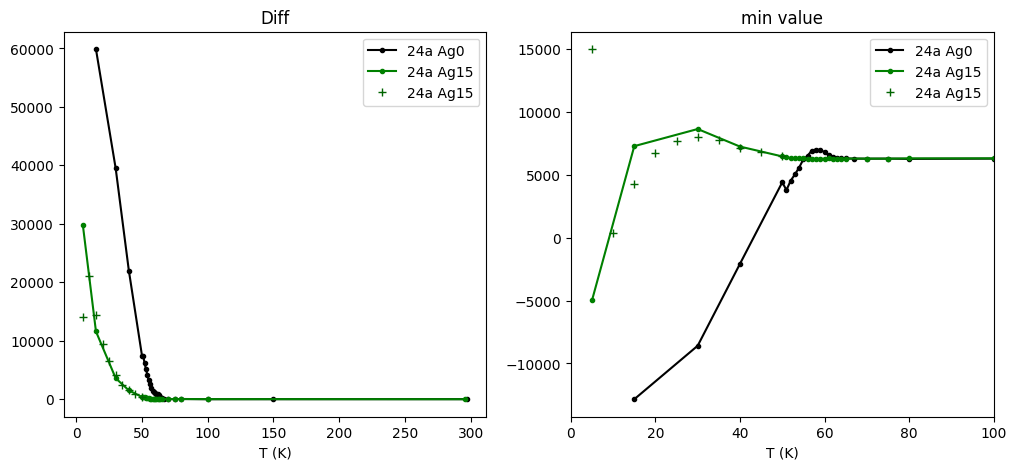

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

#ax1.plot(temp_28b_ag0, diff_28b_ag0, '.-', label='28b Ag0', color='red')
ax1.plot(temp_24a_ag0[1:], diff_24a_ag0[1:], '.-', label='24a Ag0', color='black')
#ax1.plot(temp_28b_ag15[1:], diff_28b_ag15[1:], '.-', label='28b Ag15', color='blue')
ax1.plot(temp_24a_ag15, diff_24a_ag15, '.-', label='24a Ag15', color='green')
ax1.plot(temp_data2[1:], diff_data2[1:], '+', label='24a Ag15', color='darkgreen')

#ax1.set_xlim(0,160)
#ax1.set_ylim(-100,3000)

ax1.set_xlabel("T (K)")
ax1.set_title("Diff")
ax1.legend()

#ax2.plot(temp_28b_ag0, min_28b_ag0, '.-', label='28b Ag0', color='red')
ax2.plot(temp_24a_ag0[1:], min_24a_ag0[1:], '.-', label='24a Ag0', color='black')
#ax2.plot(temp_28b_ag15[1:], min_28b_ag15[1:], '.-', label='28b Ag15', color='blue')
ax2.plot(temp_24a_ag15, min_24a_ag15, '.-', label='24a Ag15', color='green')
ax2.plot(temp_data2[1:], min_data2[1:], '+', label='24a Ag15', color='darkgreen')

ax2.set_xlim(0,100)
#ax2.set_ylim(0,10000)

ax2.set_xlabel("T (K)")
ax2.set_title("min value")
ax2.legend()


j=22-->T=80.0
i=24-->T=80.0


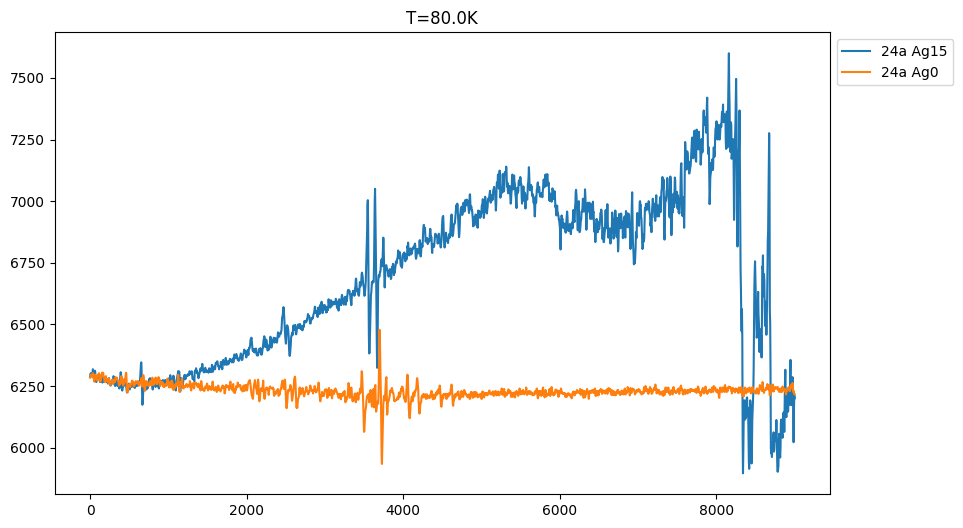

In [12]:

T = 80.0
j = np.where(temp_24a_ag15 == T)[0][0]
i = np.where(temp_24a_ag0 == T)[0][0]
print(f"j={j}-->T={temp_24a_ag15[j]}")
print(f"i={i}-->T={temp_24a_ag0[i]}")

#j,i=-1,-1 #for RT
plt.figure(figsize=(10,6))
plt.plot(field_24a_ag15[j], int_24a_ag15[j], label="24a Ag15")
plt.plot(field_24a_ag0[i], int_24a_ag0[i], label="24a Ag0")

plt.title(f"T={temp_24a_ag0[i]}K")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(0,80)
plt.show()
    

### 24a Ag all

7014.0
4623.4453125


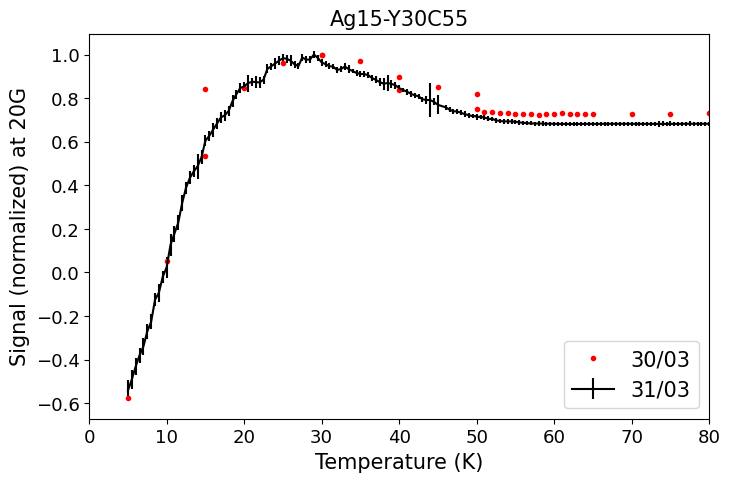

In [159]:

plt.figure(figsize=(8,5))

# plt.plot(temp_24a_ag0, min_24a_ag0/np.max(min_24a_ag0), '.-', label='24a YBCO30 Ag0 27/03', color='darkgreen')
print(np.max(min_24a_ag0))
plt.errorbar(tscan_24a_ag15[0][1:], tscan_24a_ag15[1][1:]/np.max(tscan_24a_ag15[1]), yerr=tscan_24a_ag15[2][1:]/np.max(tscan_24a_ag15[1]),  color='black', label='31/03')
# plt.errorbar(tscan_24a_ag10[0], tscan_24a_ag10[1]/np.max(tscan_24a_ag10[1]), yerr=tscan_24a_ag10[2]/np.max(tscan_24a_ag10[1]),  color='red', label='24a YBCO30 Ag10 28/04')
# plt.errorbar(tscan_24a_ag5[0], tscan_24a_ag5[1]/np.max(tscan_24a_ag5[1]), yerr=tscan_24a_ag5[2]/np.max(tscan_24a_ag5[1]),  color='blue', label='24a YBCO30 Ag5 28/04')

plt.plot(temp_data2[2:], min_data2[2:]/np.max(min_data2[2:]), '.', label='30/03', color='red')
plt.plot(temp_24a_ag15, min_24a_ag15/np.max(min_24a_ag15), '.', color = "red")#, label='24a Ag15 - tdep1 30/03', color='red')

# plt.errorbar(tscan_24a_ag0[0], tscan_24a_ag0[1]/np.max(tscan_24a_ag0[1]), yerr=tscan_24a_ag0[2]/np.max(tscan_24a_ag0[1]),  color='darkgreen', label='24a YBCO30 Ag0 29/04')
# plt.axvline(58)

plt.title("Ag15-Y30C55", fontsize=15)
print(np.max(tscan_24a_ag15))
plt.xlim(0,80)
# plt.ylim(0.5,1.1)
# plt.axvline(57, linestyle='--', color='grey')
plt.xlabel("Temperature (K)", fontsize=15)
plt.ylabel("Signal (normalized) at 20G", fontsize=15)
# plt.gca().set_yticklabels([])
plt.tick_params(axis="both", which="major", labelsize=13)
plt.legend(fontsize=15, loc="lower right")
plt.savefig(save_fig+"24a, ag all")
plt.show()

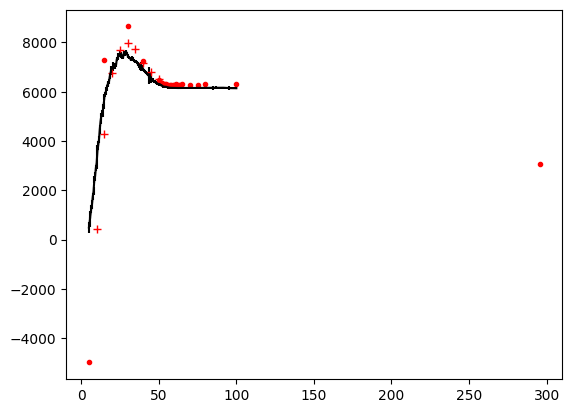

In [22]:
plt.errorbar(tscan_24a_ag15[0][1:], tscan_24a_ag15[1][1:]+3000, yerr=tscan_24a_ag15[2][1:],  color='black', label='24a YBCO30 Ag15 31/03')
plt.plot(temp_data2[2:], min_data2[2:], '+', label='24a Ag15 - tdep2 30/03', color='red')
plt.plot(temp_24a_ag15, min_24a_ag15, '.', label='24a Ag15 - tdep1 30/03', color='red')

### 27a YBCO60 Ag0

i=2-->T=15.0


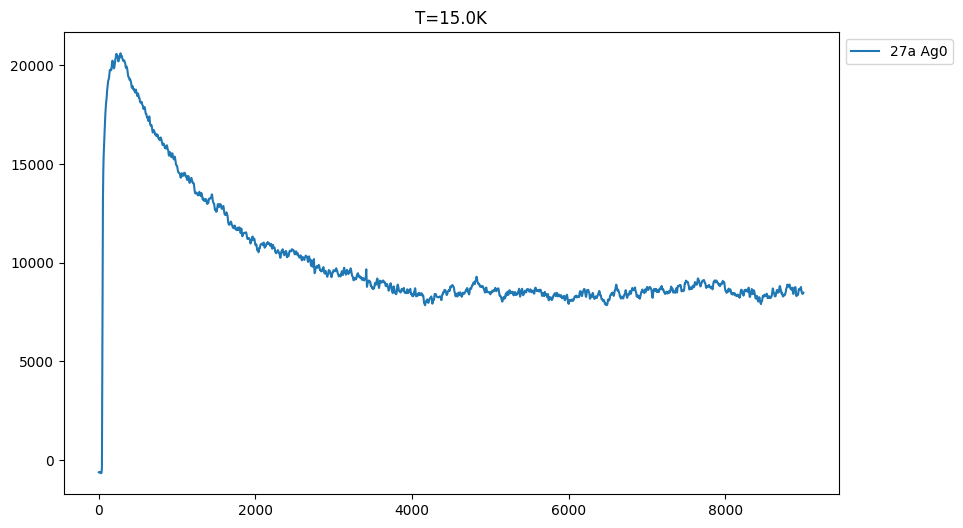

In [158]:
T = 15.0
i = np.where(temp_27a_ag0 == T)[0][0]
print(f"i={i}-->T={temp_27a_ag0[i]}")

#j,i=-1,-1 #for RT
plt.figure(figsize=(10,6))
plt.plot(field_27a_ag0[i], int_27a_ag0[i], label="27a Ag0")

plt.title(f"T={temp_27a_ag0[i]}K")
plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
#plt.xlim(0,80)
plt.show()
    

### 27a ybco60 Tscan Ag all

ag0
scale 103910.46875
ag5
scale 67727.05078125
ag10
scale 23064.23828125
ag15
scale 23616.1328125


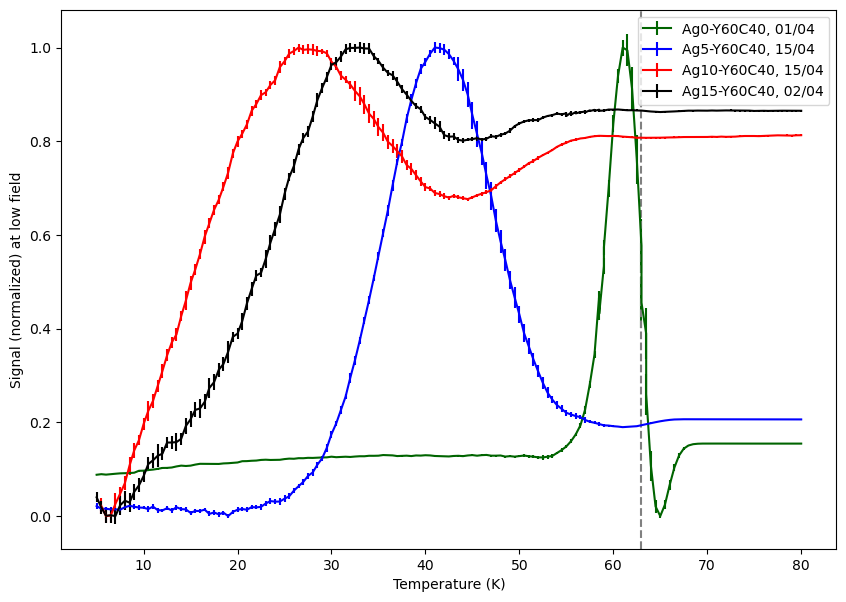

In [51]:


plt.figure(figsize=(10,7))
print("ag0")
y1, yerr1 = normalize(tscan_27a_ag0[1], tscan_27a_ag0[2])
plt.errorbar(tscan_27a_ag0[0], y1, yerr=yerr1,color='darkgreen', label="Ag0-Y60C40, 01/04") # label='27a YBCO60 Ag0 01/04')

print("ag5")
y1, yerr1 = normalize(tscan_27a_ag5[1], tscan_27a_ag5[2])
plt.errorbar(tscan_27a_ag5[0], y1, yerr=yerr1,color='blue', label="Ag5-Y60C40, 15/04") # label='27a YBCO60 Ag0 01/04')

print("ag10")
y1, yerr1 = normalize(tscan_27a_ag10[1], tscan_27a_ag10[2])
plt.errorbar(tscan_27a_ag10[0], y1, yerr=yerr1,color='red', label="Ag10-Y60C40, 15/04")

print("ag15")
y1, yerr1 = normalize(tscan_27a_ag15[1], tscan_27a_ag15[2])
plt.errorbar(tscan_27a_ag15[0], y1, yerr=yerr1,color='black', label="Ag15-Y60C40, 02/04")

# print(np.max(tscan_27a_ag0[1]))
# print(np.max(tscan_27a_ag15[1]))
# plt.xlim(0,90)
# plt.axvline(61.0)
#plt.axvline(60.5)

plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at low field")#plt.gca().set_yticklabels([])
plt.axvline(63, linestyle='--', color='grey')
plt.legend()
# plt.savefig(save_thesis+"27a ag all")
plt.show()

90986.30859375
18603.8671875
69334.70703125
19831.46484375


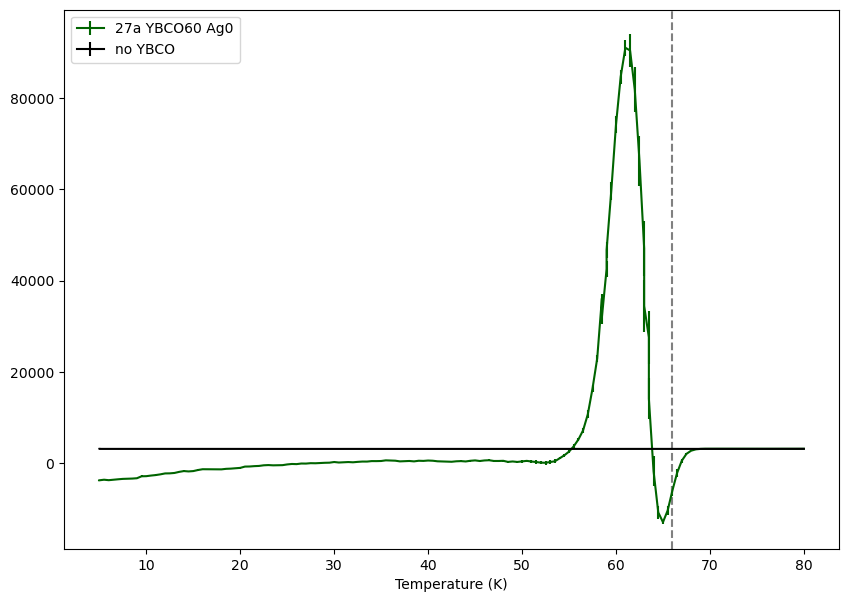

In [37]:
plt.figure(figsize=(10,7))
# plt.errorbar(tscan_27a_ag0[0], tscan_27a_ag0[1]/np.max(tscan_27a_ag0[1]), yerr=tscan_27a_ag0[2]/np.max(tscan_27a_ag0[1]),  color='darkgreen', label='27a YBCO60 Ag0 01/04')
# plt.errorbar(tscan_27a_ag15[0], tscan_27a_ag15[1]/np.max(tscan_27a_ag15[1]), yerr=tscan_27a_ag15[2]/np.max(tscan_27a_ag15[1]),  color='black', label='27a YBCO60 Ag15 02/04')
# plt.errorbar(tscan_27a_ag5[0], tscan_27a_ag5[1]/np.max(tscan_27a_ag5[1]), yerr=tscan_27a_ag5[2]/np.max(tscan_27a_ag5[1]),  color='blue', label='27a YBCO60 Ag5 15/04')
# plt.errorbar(tscan_27a_ag10[0], tscan_27a_ag10[1]/np.max(tscan_27a_ag10[1]), yerr=tscan_27a_ag10[2]/np.max(tscan_27a_ag10[1]),  color='red', label='27a YBCO60 Ag10 15/04')


plt.errorbar(tscan_27a_ag0[0], tscan_27a_ag0[1], yerr=tscan_27a_ag0[2],  color='darkgreen', label='27a YBCO60 Ag0')
# plt.errorbar(tscan_27a_ag0_cool0field[0][1:], tscan_27a_ag0_cool0field[1][1:], yerr=tscan_27a_ag0_cool0field[2][1:],  color='purple', label='27a YBCO60 Ag0 - cool 0 field')
# plt.errorbar(tscan_27a_ag0_check[0], tscan_27a_ag0_check[1], yerr=tscan_27a_ag0_check[2],  color='grey', label='27a YBCO60 Ag0 check')
# plt.errorbar(tscan_27a_ag0_0field[0], tscan_27a_ag0_0field[1], yerr=tscan_27a_ag0_0field[2],  color='black', label='27a YBCO60 Ag0 - 0 field')

plt.errorbar(tscan_19a_ag0[0], tscan_19a_ag0[1], yerr=tscan_19a_ag0[2] , color='black', label='no YBCO')

print(np.max(tscan_27a_ag0[1]))
print(np.max(tscan_27a_ag15[1]))
print(np.max(tscan_27a_ag5[1]))
print(np.max(tscan_27a_ag10[1]))
#plt.xlim(50,70)
# plt.axvline(61.0)
#plt.axvline(60.5)

plt.xlabel("Temperature (K)")
# plt.ylabel("Signal (normalized) at 20G")#plt.gca().set_yticklabels([])
plt.axvline(66, linestyle='--', color='grey')
plt.legend()
# plt.savefig(save_fig+"27a, ag0 cool0field")
plt.show()

C:\Users\Costa\AppData\Local\Temp\ipykernel_2540\1069738175.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


ag0
scale 103910.46875
ag0 cool 0 field
scale 39307.91015625
ag0 0 field


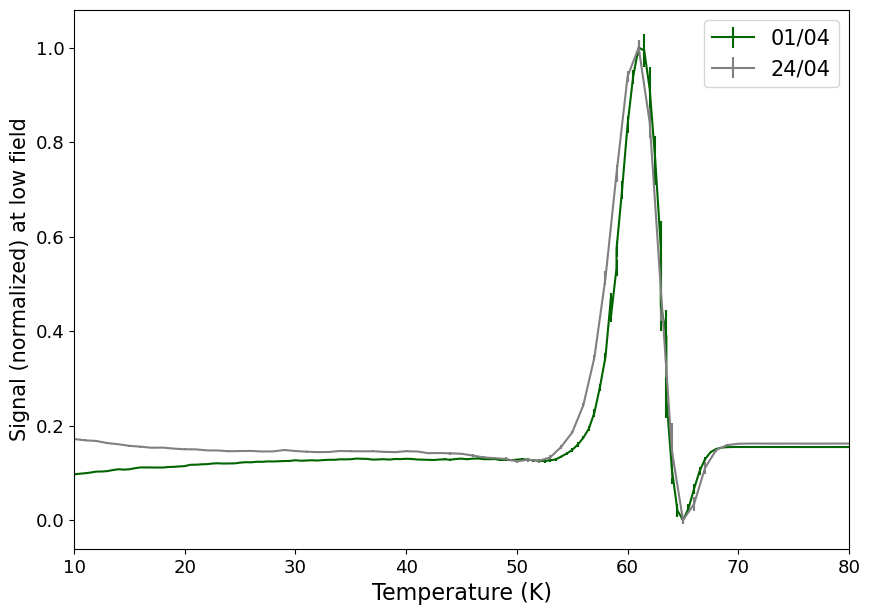

In [138]:

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 3))

plt.figure(figsize=(10,7))
print("ag0")
y1, yerr1 = normalize(tscan_27a_ag0[1], tscan_27a_ag0[2])
plt.errorbar(tscan_27a_ag0[0], y1, yerr=yerr1,color='darkgreen', label="01/04")#"Signal at 20G, after one full sweep") # label='27a YBCO60 Ag0 01/04')

print("ag0 cool 0 field")
# y2, yerr2 = normalize(tscan_27a_ag0_cool0field[1][1:],tscan_27a_ag0_cool0field[2][1:])
# plt.errorbar(tscan_27a_ag0_cool0field[0][1:], y2, yerr=yerr2, color='purple', label="Signal at 20G, cooled in 0-field")#label='27a YBCO60 Ag0 - cool 0 field 14/04')

# print("ag0 24/04")
y3, yerr3 = normalize(tscan_27a_ag0_check[1], tscan_27a_ag0_check[2])
plt.errorbar(tscan_27a_ag0_check[0], y3, yerr=yerr3, color='grey', label="24/04")#label='27a YBCO60 Ag0 check 24/04')

print("ag0 0 field")
# y4, yerr4 = normalize(tscan_27a_ag0_0field[1], tscan_27a_ag0_0field[2])
# plt.errorbar(tscan_27a_ag0_0field[0], y4, yerr=yerr4, color='black', label=r"Signal at $\sim$0G, cooled in 0-field")# label='27a YBCO60 Ag0 - 0 field 25/04')

# y4, yerr4 = normalize(tscan_19a_ag0[1], tscan_19a_ag0[2])
# plt.errorbar(tscan_19a_ag0[0], y4, yerr=yerr4 , color='grey', label='no YBCO')

# print(np.max(tscan_27a_ag0[1]))
# print(np.max(tscan_27a_ag15[1]))
# # plt.xlim(50,70)
# plt.axvline(61.0)
#plt.axvline(60.5)

plt.xlim(10,80)
plt.xlabel("Temperature (K)", fontsize=16)
plt.ylabel("Signal (normalized) at low field", fontsize=15)#plt.gca().set_yticklabels([])
# plt.axvline(66, linestyle='--', color='grey', label ="Tc from transport")
plt.legend(fontsize=15)
plt.tick_params(axis="both", which="major", labelsize=13)
plt.savefig(save_thesis+"27a ag0 repetition")
plt.show()

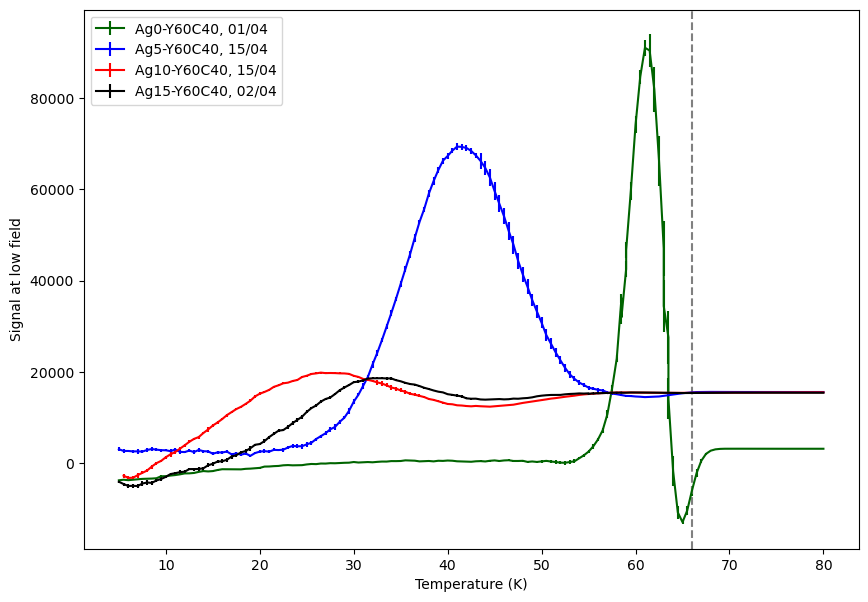

In [14]:

plt.figure(figsize=(10,7))
plt.errorbar(tscan_27a_ag0[0], tscan_27a_ag0[1], yerr=tscan_27a_ag0[2],  color='darkgreen', label="Ag0-Y60C40, 01/04") 
plt.errorbar(tscan_27a_ag5[0], tscan_27a_ag5[1], yerr=tscan_27a_ag5[2],  color='blue', label="Ag5-Y60C40, 15/04")
plt.errorbar(tscan_27a_ag10[0], tscan_27a_ag10[1], yerr=tscan_27a_ag10[2],  color='red', label="Ag10-Y60C40, 15/04")
plt.errorbar(tscan_27a_ag15[0], tscan_27a_ag15[1], yerr=tscan_27a_ag15[2],  color='black', label="Ag15-Y60C40, 02/04")

# plt.xlim(40,80)
# plt.ylim(12000,20000)
# plt.tick_params(axis='x', which='major', labelsize=15, width=2.5, length=10)

plt.xlabel("Temperature (K)")
plt.ylabel("Signal at low field")#plt.gca().set_yticklabels([])
plt.axvline(66, linestyle='--', color='grey')
plt.legend()
plt.savefig(save_thesis+"27a ag all")
plt.show()


### 26A: Ag all

16812.34375
17417.94921875


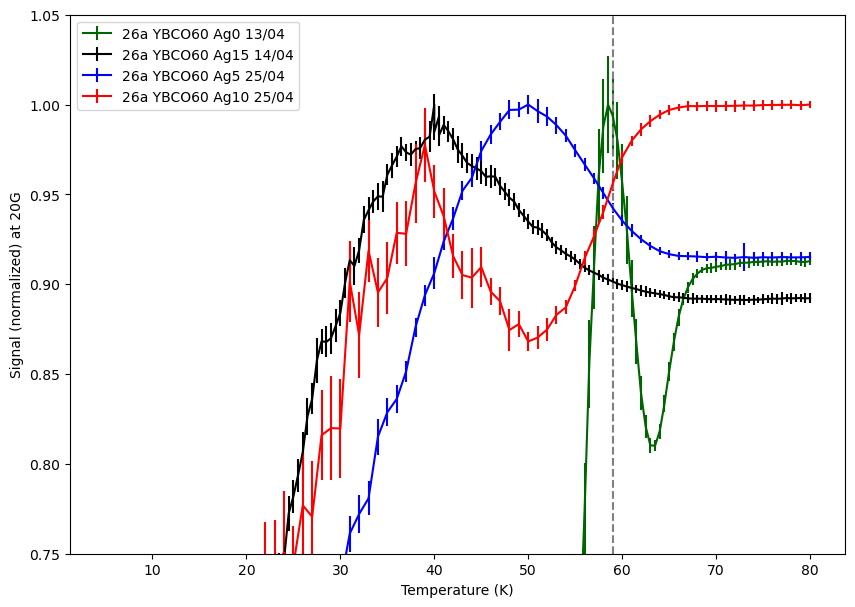

In [53]:
plt.figure(figsize=(10,7))
plt.errorbar(tscan_26a_ag0[0], tscan_26a_ag0[1]/np.max(tscan_26a_ag0[1]), yerr=tscan_26a_ag0[2]/np.max(tscan_26a_ag0[1]),  color='darkgreen', label='26a YBCO60 Ag0 13/04')
plt.errorbar(tscan_26a_ag15[0][1:], tscan_26a_ag15[1][1:]/np.max(tscan_26a_ag15[1]), yerr=tscan_26a_ag15[2][1:]/np.max(tscan_26a_ag15[1]),  color='black', label='26a YBCO60 Ag15 14/04')
plt.errorbar(tscan_26a_ag5[0], tscan_26a_ag5[1]/np.max(tscan_26a_ag5[1]), yerr=tscan_26a_ag5[2]/np.max(tscan_26a_ag5[1]),  color='blue', label='26a YBCO60 Ag5 25/04')
plt.errorbar(tscan_26a_ag10[0], tscan_26a_ag10[1]/np.max(tscan_26a_ag10[1]), yerr=tscan_26a_ag10[2]/np.max(tscan_26a_ag10[1]),  color='red', label='26a YBCO60 Ag10 25/04')

plt.ylim(0.75, 1.05)
print(np.max(tscan_26a_ag0[1]))
print(np.max(tscan_26a_ag15[1]))

plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")#plt.gca().set_yticklabels([])
plt.axvline(59, linestyle='--', color='grey')
plt.legend(loc='upper left')#,bbox_to_anchor=(1, 1), borderpad=1, fontsize=11)

plt.savefig(save_fig+"26a, ag all")
plt.show()

### 28a: Ag all

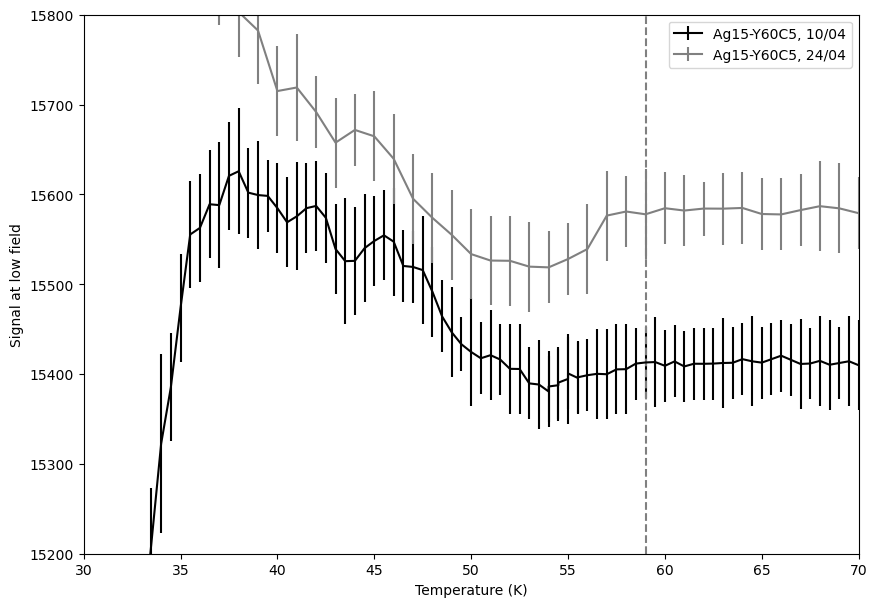

In [16]:

plt.figure(figsize=(10,7))
# plt.errorbar(tscan_28a_ag0[0], tscan_28a_ag0[1], yerr=tscan_28a_ag0[2],  color='darkgreen', label="Ag0-Y60C5, 09/04") 
# plt.errorbar(tscan_28a_ag5[0], tscan_28a_ag5[1], yerr=tscan_28a_ag5[2],  color='blue', label="Ag5-Y60C5, 23/04")
# plt.errorbar(tscan_28a_ag10[0], tscan_28a_ag10[1], yerr=tscan_28a_ag10[2],  color='red', label="Ag10-Y60C5, 24/04")
plt.errorbar(tscan_28a_ag15[0], tscan_28a_ag15[1], yerr=tscan_28a_ag15[2],  color='black', label="Ag15-Y60C5, 10/04")
plt.errorbar(tscan_28a_ag15_check[0], tscan_28a_ag15_check[1], yerr=tscan_28a_ag15_check[2],  color='grey', label="Ag15-Y60C5, 24/04")

plt.xlim(30,70)
plt.ylim(15200,15800)
# plt.tick_params(axis='x', which='major', labelsize=15, width=2.5, length=10)

plt.xlabel("Temperature (K)")
plt.ylabel("Signal at low field")#plt.gca().set_yticklabels([])
plt.axvline(59, linestyle='--', color='grey')
plt.legend()
# plt.savefig(save_thesis+"28a ag 15")
plt.show()


ag0
scale 46473.2421875
ag5
scale 145406.875
ag10
scale 14384.70703125
ag15
ag15
scale 20202.01171875


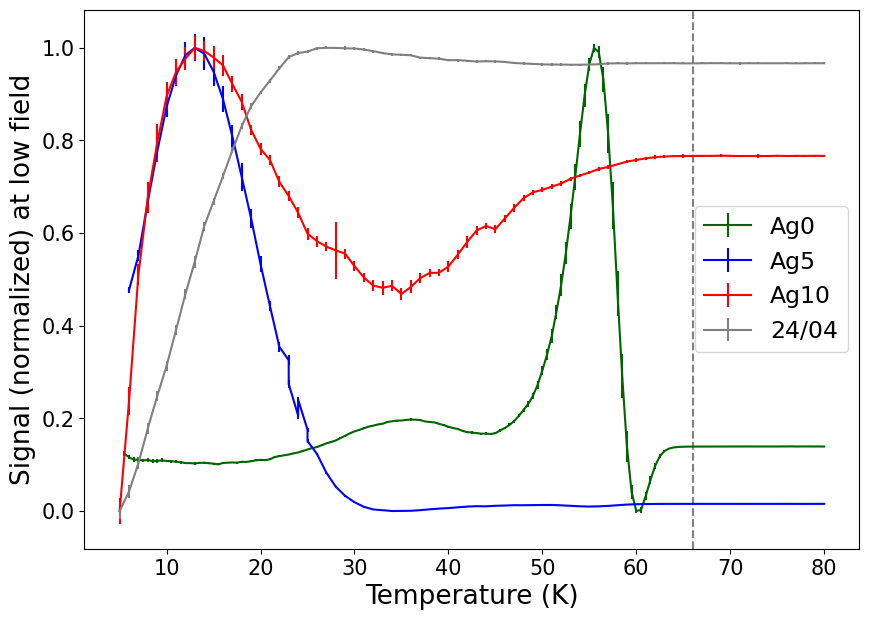

In [ ]:


plt.figure(figsize=(10,7))
print("ag0")
y1, yerr1 = normalize(tscan_28a_ag0[1][1:], tscan_28a_ag0[2][1:])
plt.errorbar(tscan_28a_ag0[0][1:], y1, yerr=yerr1,color='darkgreen', label="Ag0")#-Y60C5, 09/04") # label='27a YBCO60 Ag0 01/04')

print("ag5")
y1, yerr1 = normalize(tscan_28a_ag5[1][1:], tscan_28a_ag5[2][1:])
plt.errorbar(tscan_28a_ag5[0][1:], y1, yerr=yerr1,color='blue', label="Ag5")#-Y60C5")#, 23/04") # label='27a YBCO60 Ag0 01/04')

print("ag10")
y1, yerr1 = normalize(tscan_28a_ag10[1], tscan_28a_ag10[2])
plt.errorbar(tscan_28a_ag10[0], y1, yerr=yerr1,color='red', label="Ag10")#-Y60C5, 24/04")

print("ag15")
# y1, yerr1 = normalize(tscan_28a_ag15[1], tscan_28a_ag15[2])
# plt.errorbar(tscan_28a_ag15[0], y1, yerr=yerr1,color='black', label = "10/04")

print("ag15")
y1, yerr1 = normalize(tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
plt.errorbar(tscan_28a_ag15_check[0], y1, yerr=yerr1,color='black', label="Ag15")#-Y60C5, 24/04")

# print(np.max(tscan_27a_ag0[1]))
# print(np.max(tscan_27a_ag15[1]))
# plt.xlim(45,65)
# plt.ylim(-0.01,0.03)
# plt.axvline(61.0)
#plt.axvline(60.5)





# plt.title("Y60C5", fontsize=19)
plt.xlabel("Temperature (K)",fontsize=19)
plt.ylabel("Signal (normalized) at low field", fontsize=19)#plt.gca().set_yticklabels([])
plt.axvline(66, linestyle='--', color='grey')
plt.legend(fontsize=17)#, loc="upper left")
plt.tick_params(axis="both", which="major", labelsize=15)
# plt.savefig(save_thesis+"28b ag all")
plt.savefig(save_thesis+"28a ag all")
# plt.savefig(save_thesis+"28a ag 5")
plt.show()

55410.87890625
15625.7421875


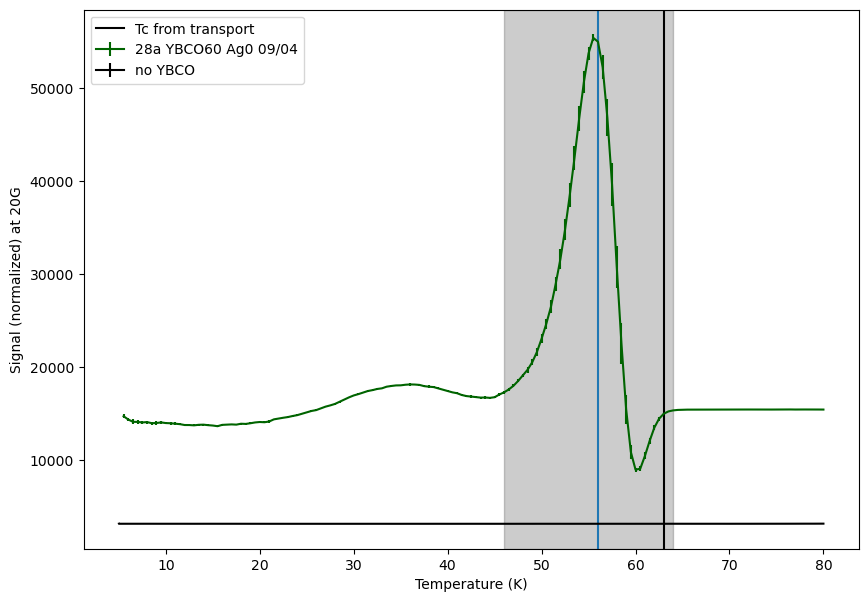

In [55]:
plt.figure(figsize=(10,7))
plt.errorbar(tscan_28a_ag0[0][1:], tscan_28a_ag0[1][1:], yerr=tscan_28a_ag0[2][1:],  color='darkgreen', label=f'28a YBCO60 Ag0 09/04')
plt.errorbar(tscan_19a_ag0[0], tscan_19a_ag0[1], yerr=tscan_19a_ag0[2] , color='black', label='no YBCO')

# plt.errorbar(tscan_28a_ag15[0][1:], tscan_28a_ag15[1][1:]/np.max(tscan_28a_ag15[1]), yerr=tscan_28a_ag15[2][1:]/np.max(tscan_28a_ag15[1]),  color='black', label='28a YBCO60 Ag15 10/04')
# plt.errorbar(tscan_28a_ag5[0][1:], tscan_28a_ag5[1][1:]/np.max(tscan_28a_ag5[1]), yerr=tscan_28a_ag5[2][1:]/np.max(tscan_28a_ag5[1]),  color='blue', label='28a YBCO60 Ag5 23/04')
# plt.errorbar(tscan_28a_ag10[0], tscan_28a_ag10[1]/np.max(tscan_28a_ag10[1]), yerr=tscan_28a_ag10[2]/np.max(tscan_28a_ag10[1]),  color='red', label='28a YBCO60 Ag10 24/04')

# plt.errorbar(tscan_28a_ag15_check[0], tscan_28a_ag15_check[1]/np.max(tscan_28a_ag15_check[1]), yerr=tscan_28a_ag15_check[2]/np.max(tscan_28a_ag15_check[1]),  color='grey', label='28a YBCO60 Ag15 24/04')



print(np.max(tscan_28a_ag0[1]))
print(np.max(tscan_28a_ag15[1]))
plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
plt.axvline(63, linestyle='-', color='black', label = 'Tc from transport')
# plt.axvline(64, linestyle='--', color='orange')
# plt.axvline(46, linestyle='--', color='orange')
plt.axvspan(46, 64, color='black', alpha=0.2)
# plt.xlim(10,80)
plt.axvline(56)
# plt.gca().set_yticklabels([])
# plt.ylim(0.15,0.2)
# plt.xlim(40,70)
# plt.axvline(62, linestyle='--', color='orange')
# plt.axvline(51, linestyle='--', color='orange')
plt.legend()
# plt.savefig(save_fig+"28a, ag 15")
plt.show()

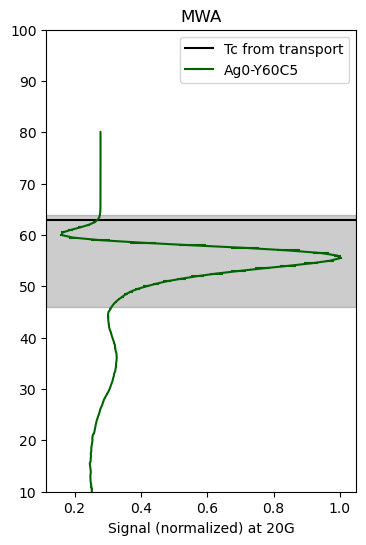

In [27]:
plt.figure(figsize=(4,6))
plt.errorbar( tscan_28a_ag0[1][1:]/np.max(tscan_28a_ag0[1]),tscan_28a_ag0[0][1:], xerr=tscan_28a_ag0[2][1:]/np.max(tscan_28a_ag0[1]),  color='darkgreen', label=f'Ag0-Y60C5')
# plt.errorbar(tscan_28a_ag15[0][1:], tscan_28a_ag15[1][1:]/np.max(tscan_28a_ag15[1]), yerr=tscan_28a_ag15[2][1:]/np.max(tscan_28a_ag15[1]),  color='black', label='28a YBCO60 Ag15 10/04')
# plt.errorbar(tscan_28a_ag5[0][1:], tscan_28a_ag5[1][1:]/np.max(tscan_28a_ag5[1]), yerr=tscan_28a_ag5[2][1:]/np.max(tscan_28a_ag5[1]),  color='blue', label='28a YBCO60 Ag5 23/04')
# plt.errorbar(tscan_28a_ag10[0], tscan_28a_ag10[1]/np.max(tscan_28a_ag10[1]), yerr=tscan_28a_ag10[2]/np.max(tscan_28a_ag10[1]),  color='red', label='28a YBCO60 Ag10 24/04')

# plt.errorbar(tscan_28a_ag15_check[0], tscan_28a_ag15_check[1]/np.max(tscan_28a_ag15_check[1]), yerr=tscan_28a_ag15_check[2]/np.max(tscan_28a_ag15_check[1]),  color='grey', label='28a YBCO60 Ag15 24/04')



# plt.ylabel("Temperature (K)")
plt.xlabel("Signal (normalized) at 20G")
plt.axhline(63, linestyle='-', color='black', label = 'Tc from transport')
# plt.axvline(64, linestyle='--', color='orange')
# plt.axvline(46, linestyle='--', color='orange')
plt.axhspan(46, 64, color='black', alpha=0.2)
plt.ylim(10,100)

# plt.gca().set_yticklabels([])
# plt.ylim(0.15,0.2)
# plt.xlim(40,70)
# plt.axvline(62, linestyle='--', color='orange')
# plt.axvline(51, linestyle='--', color='orange')
plt.title("MWA")
plt.legend()
# plt.savefig(save_fig+"28a, ag 15")
plt.show()
path = "C:/Users/Costa/UNIVERSITÀ/tesi/mw abs data/"
np.save(path+"Y60C5_temp", tscan_28a_ag0[0][1:])
np.save(path+"Y60C5_mwa", tscan_28a_ag0[1][1:]/np.max(tscan_28a_ag0[1]))
np.save(path+"Y60C5_err",tscan_28a_ag0[2][1:]/np.max(tscan_28a_ag0[1]))

scale 28556.9921875
scale 20202.01171875
days:14
diff max T = 10.5
diff min T = 0.0


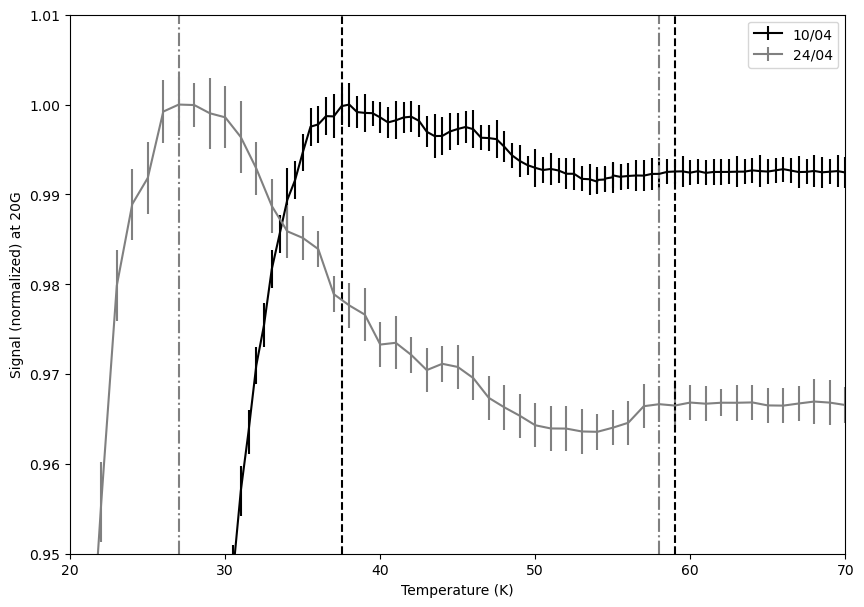

In [ ]:


plt.figure(figsize=(10,7))
# y1, yerr1 = normalize(tscan_28a_ag0[1][1:], tscan_28a_ag0[2][1:])
# # y1, yerr1 = (tscan_28a_ag0[1][1:], tscan_28a_ag0[2][1:])
# plt.errorbar(tscan_28a_ag0[0][1:], y1, yerr=yerr1, color='darkgreen', label='28a YBCO60 Ag0')

y2, yerr2 = normalize(tscan_28a_ag15[1][1:], tscan_28a_ag15[2][1:])
# y2, yerr2 = (tscan_28a_ag15[1][1:], tscan_28a_ag15[2][1:])
plt.errorbar(tscan_28a_ag15[0][1:], y2, yerr=yerr2,  color='black', label='10/04')

index = np.argmax(y2)
plt.axvline(tscan_28a_ag15[0][index], color='black', linestyle='--')
Tmax2 = tscan_28a_ag15[0][index]

x2 = tscan_28a_ag15[0][1:]
x_min, x_max = 50., 60.
mask = (x2 >= x_min) & (x2 <= x_max) 
x = x2[mask]
y = y2[mask]
index = np.argmin(y)
# plt.axvline(x[index], color='black', linestyle='--')
Tmin2 = x[index]


# y3, yerr3 = normalize(tscan_28a_ag5[1][1:], tscan_28a_ag5[2][1:])
# # y3, yerr3 = (tscan_28a_ag5[1][1:], tscan_28a_ag5[2][1:])
# plt.errorbar(tscan_28a_ag5[0][1:], y3, yerr=yerr3, color='blue', label='28a YBCO60 Ag5')

# y4, yerr4 = normalize(tscan_28a_ag10[1], tscan_28a_ag10[2])
# # y4, yerr4 = (tscan_28a_ag10[1], tscan_28a_ag10[2])
# plt.errorbar(tscan_28a_ag10[0], y4, yerr=yerr4, color='red', label='28a YBCO60 Ag10')

y4, yerr4 = normalize(tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
# y4, yerr4 = (tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
plt.errorbar(tscan_28a_ag15_check[0], y4, yerr=yerr4, color='grey', label='24/04')

index = np.argmax(y4)
plt.axvline(tscan_28a_ag15_check[0][index], color='grey', linestyle='-.')
Tmax4 = tscan_28a_ag15_check[0][index]

x4 = tscan_28a_ag15_check[0]
x_min, x_max = 40., 60.
mask = (x4 >= x_min) & (x4 <= x_max) 
x = x4[mask]
y = y4[mask]
index = np.argmin(y)
# plt.axvline(x[index], color='grey', linestyle='--')
Tmin4 = x[index]

print(f'days:{14}')
print(f'diff max T = {Tmax2-Tmax4}')
print(f'diff min T = {Tmin2-Tmin4}')

plt.xlabel("Temperature (K)")
plt.ylabel("Signal (normalized) at 20G")
plt.axvline(58, linestyle='-.', color='grey')
plt.axvline(59, linestyle='--', color='black')
# plt.gca().set_yticklabels([])
plt.ylim(0.95,1.01)
plt.xlim(20,70)
plt.legend()
plt.savefig(save_thesis+"28a, ag 15 zoom")
plt.show()

scale 28852.01171875
scale 20202.01171875
scale 28556.9921875
scale 20202.01171875


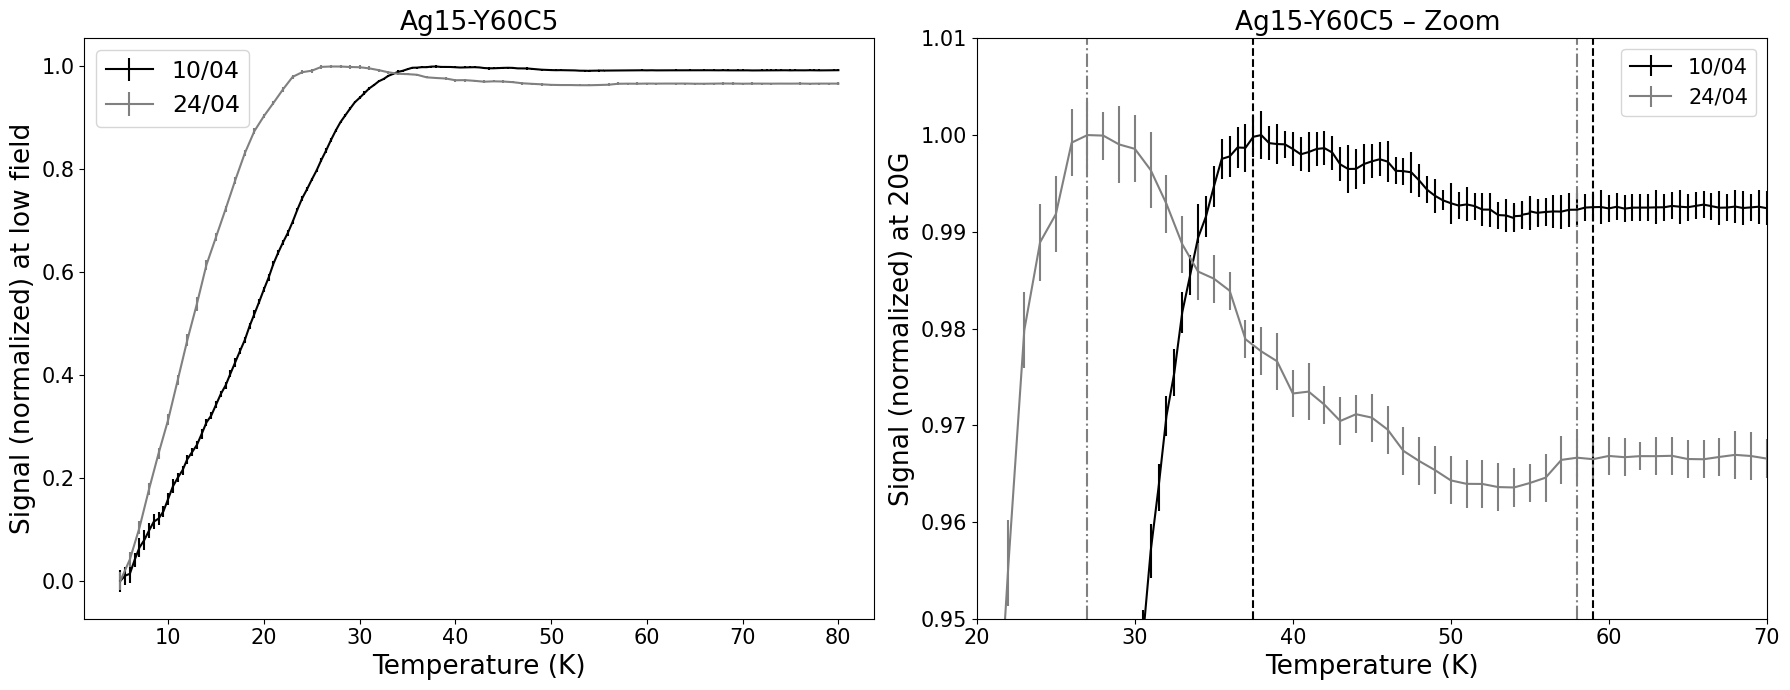

In [149]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7))  # 1 riga, 2 colonne

# === PRIMO PLOT (a sinistra) ===
ax = axes[0]
y1, yerr1 = normalize(tscan_28a_ag15[1], tscan_28a_ag15[2])
ax.errorbar(tscan_28a_ag15[0], y1, yerr=yerr1, color='black', label="10/04")

y1, yerr1 = normalize(tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
ax.errorbar(tscan_28a_ag15_check[0], y1, yerr=yerr1, color='grey', label="24/04")

ax.set_xlabel("Temperature (K)", fontsize=19)
ax.set_ylabel("Signal (normalized) at low field", fontsize=19)
ax.legend(fontsize=17, loc="upper left")
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Ag15-Y60C5", fontsize=19)

# === SECONDO PLOT (a destra) ===
ax = axes[1]
y2, yerr2 = normalize(tscan_28a_ag15[1][1:], tscan_28a_ag15[2][1:])
ax.errorbar(tscan_28a_ag15[0][1:], y2, yerr=yerr2, color='black', label='10/04')
Tmax2 = tscan_28a_ag15[0][np.argmax(y2)]
ax.axvline(Tmax2, color='black', linestyle='--')

y4, yerr4 = normalize(tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
ax.errorbar(tscan_28a_ag15_check[0], y4, yerr=yerr4, color='grey', label='24/04')
Tmax4 = tscan_28a_ag15_check[0][np.argmax(y4)]
ax.axvline(Tmax4, color='grey', linestyle='-.')

ax.set_xlabel("Temperature (K)", fontsize=19)
ax.set_ylabel("Signal (normalized) at 20G", fontsize=19)
ax.set_xlim(20,70)
ax.set_ylim(0.95,1.01)
ax.axvline(58, linestyle='-.', color='grey')
ax.axvline(59, linestyle='--', color='black')
ax.legend(fontsize=15)
ax.tick_params(axis="both", which="major", labelsize=15)
ax.set_title("Ag15-Y60C5 – Zoom ", fontsize=19)

# === SALVA E MOSTRA ===
plt.tight_layout()
plt.savefig(save_thesis+"28a degradation")
plt.show()


scale 28556.9921875
scale 20202.01171875
days: 14
diff max T = 10.5
diff min T = 0.0


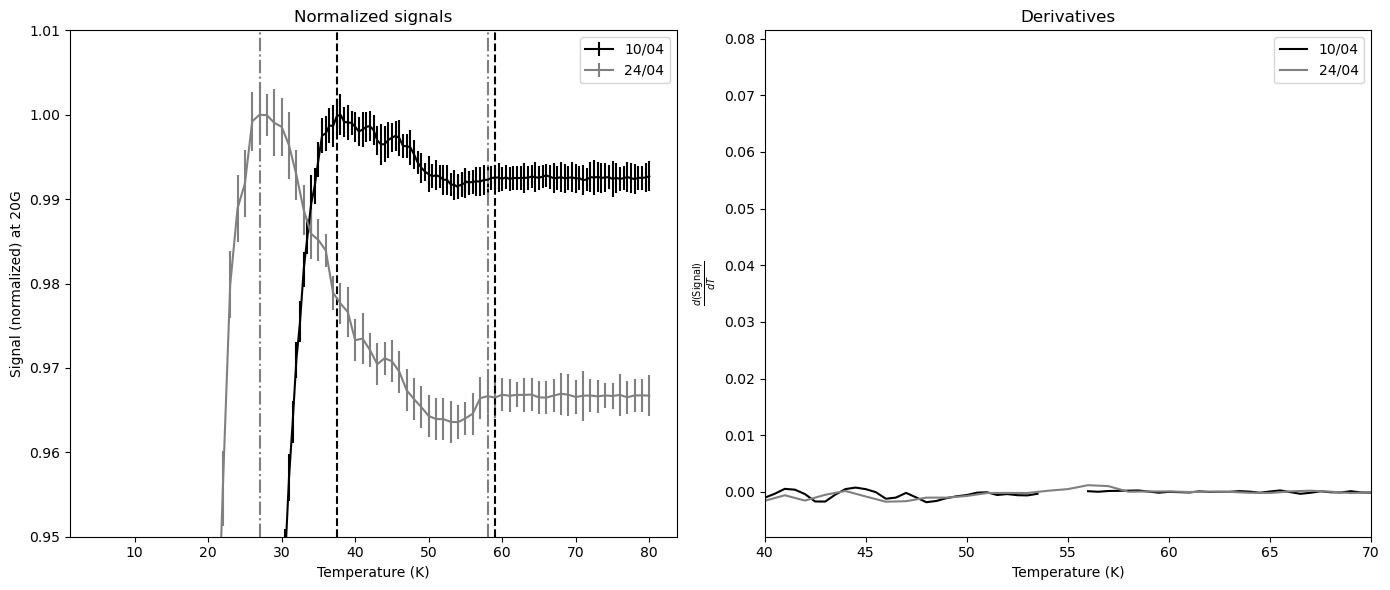

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))  # due pannelli affiancati

# --- PRIMO GRAFICO: segnali normalizzati ---
ax = axes[0]

y2, yerr2 = normalize(tscan_28a_ag15[1][1:], tscan_28a_ag15[2][1:])
ax.errorbar(tscan_28a_ag15[0][1:], y2, yerr=yerr2,  color='black', label='10/04')

index = np.argmax(y2)
ax.axvline(tscan_28a_ag15[0][index], color='black', linestyle='--')
Tmax2 = tscan_28a_ag15[0][index]

x2 = tscan_28a_ag15[0][1:]
x_min, x_max = 50., 60.
mask = (x2 >= x_min) & (x2 <= x_max) 
x = x2[mask]
y = y2[mask]
index = np.argmin(y)
Tmin2 = x[index]

y4, yerr4 = normalize(tscan_28a_ag15_check[1], tscan_28a_ag15_check[2])
ax.errorbar(tscan_28a_ag15_check[0], y4, yerr=yerr4, color='grey', label='24/04')

index = np.argmax(y4)
ax.axvline(tscan_28a_ag15_check[0][index], color='grey', linestyle='-.')
Tmax4 = tscan_28a_ag15_check[0][index]

x4 = tscan_28a_ag15_check[0]
mask = (x4 >= 40.) & (x4 <= 60.) 
x = x4[mask]
y = y4[mask]
index = np.argmin(y)
Tmin4 = x[index]

print(f'days: {14}')
print(f'diff max T = {Tmax2-Tmax4}')
print(f'diff min T = {Tmin2-Tmin4}')

ax.set_xlabel("Temperature (K)")
ax.set_ylabel("Signal (normalized) at 20G")
ax.axvline(58, linestyle='-.', color='grey')
ax.axvline(59, linestyle='--', color='black')
ax.set_ylim(0.95,1.01)
# ax.set_xlim(20,70)
ax.legend()
ax.set_title("Normalized signals")

# --- SECONDO GRAFICO: derivate ---
ax2 = axes[1]

dydT2 = np.gradient(y2, tscan_28a_ag15[0][1:])
ax2.plot(tscan_28a_ag15[0][1:], dydT2, color='black', label='10/04')

dydT4 = np.gradient(y4, tscan_28a_ag15_check[0])
ax2.plot(tscan_28a_ag15_check[0], dydT4, color='grey', label='24/04')

ax2.set_xlabel("Temperature (K)")
ax2.set_ylabel(r"$\frac{d(\text{Signal})}{dT}$")
ax2.set_xlim(40,70)
ax2.legend()
ax2.set_title("Derivatives")

plt.tight_layout()
plt.savefig(save_thesis+"28a_ag15_signals_and_derivatives")
plt.show()


### 25a

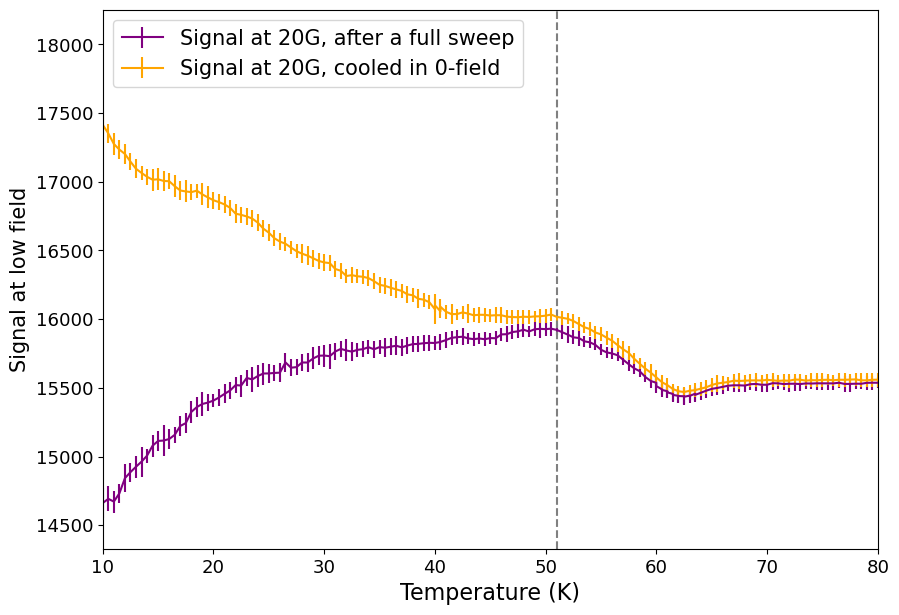

In [74]:
plt.figure(figsize=(10,7))

# plt.errorbar(tscan_25a_ag0[0], tscan_25a_ag0[1], yerr=tscan_25a_ag0[2],  color='darkgreen', label='25a CeO2/YBCO/CeO2 Ag0')
# plt.errorbar(tscan_25a_ag5[0], tscan_25a_ag5[1], yerr=tscan_25a_ag5[2],  color='blue', label='25a CeO2/YBCO/CeO2 Ag5')
# plt.errorbar(tscan_25a_ag0_check[0], tscan_25a_ag0_check[1], yerr=tscan_25a_ag0_check[2],  color='black', label='25a CeO2/YBCO/CeO2 Ag0 check')
plt.errorbar(tscan_25a_ag0_2204[0], tscan_25a_ag0_2204[1], yerr=tscan_25a_ag0_2204[2],  color='purple', label='Signal at 20G, after a full sweep')#22/04')
plt.errorbar(tscan_25a_ag0_2204_0[0], tscan_25a_ag0_2204_0[1], yerr=tscan_25a_ag0_2204_0[2],  color='orange', label='Signal at 20G, cooled in 0-field')#'25a CeO2/YBCO/CeO2 Ag0 22/04 cool0field')
# plt.errorbar(tscan_25a_ag0_2204_1k[0], tscan_25a_ag0_2204_1k[1], yerr=tscan_25a_ag0_2204_1k[2],  color='blue', label='25a CeO2/YBCO/CeO2 Ag0 22/04 step1k')
# plt.errorbar(tscan_25a_ag0_2204_5deg[0], tscan_25a_ag0_2204_5deg[1], yerr=tscan_25a_ag0_2204_5deg[2],  color='red', label='25a CeO2/YBCO/CeO2 Ag0 22/04 5deg')
# plt.errorbar(tscan_25a_ag0_2204_5deg_0[0], tscan_25a_ag0_2204_5deg_0[1], yerr=tscan_25a_ag0_2204_5deg_0[2],  color='black', label='25a CeO2/YBCO/CeO2 Ag0 22/04 5deg cool0field')
# plt.errorbar(tscan_25a_ag5_check[0], tscan_25a_ag5_check[1], yerr=tscan_25a_ag5_check[2],  color='black', label='25a CeO2/YBCO/CeO2 Ag5 28/04')
# plt.errorbar(tscan_25a_ag0_3004[0], tscan_25a_ag0_3004[1], yerr=tscan_25a_ag0_3004[2],  color='black', label='25a CeO2/YBCO/CeO2 Ag0 30/04')
# plt.errorbar(tscan_25a_ag0_3004_inplane[0], tscan_25a_ag0_3004_inplane[1], yerr=tscan_25a_ag0_3004_inplane[2],  color='grey', label='25a CeO2/YBCO/CeO2 Ag0 30/04 inplane')


# plt.axvline(9, linestyle='dashed', color='green')
# plt.axvline(74, linestyle='dashed', color='green')

plt.axvline(51, linestyle='dashed', color='grey')
# plt.axvline(67, linestyle='dashed', color='grey')


# plt.xlim(50,80)
# plt.ylim(3000,3300)
plt.xlim(10,80)
plt.xlabel("Temperature (K)", fontsize=16)
plt.ylabel("Signal at low field", fontsize=15)#plt.gca().set_yticklabels([])

plt.legend(fontsize=15)
plt.tick_params(axis="both", which="major", labelsize=13)
plt.savefig(save_thesis+"25a ag0")
plt.show()
path = "C:/Users/Costa/UNIVERSITÀ/tesi/mw abs data/"
np.save(path+"25a_temp", tscan_25a_ag0_2204[0])
np.save(path+"25a_mwa", tscan_25a_ag0_2204[1])
np.save(path+"25a_err",tscan_25a_ag0_2204[2])
np.save(path+"25a_0_temp", tscan_25a_ag0_2204_0[0])
np.save(path+"25a_0_mwa", tscan_25a_ag0_2204_0[1])
np.save(path+"25a_0_err",tscan_25a_ag0_2204_0[2])

C:\Users\Costa\AppData\Local\Temp\ipykernel_2540\2910328613.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


scale 2049.6484375
scale 270.91015625


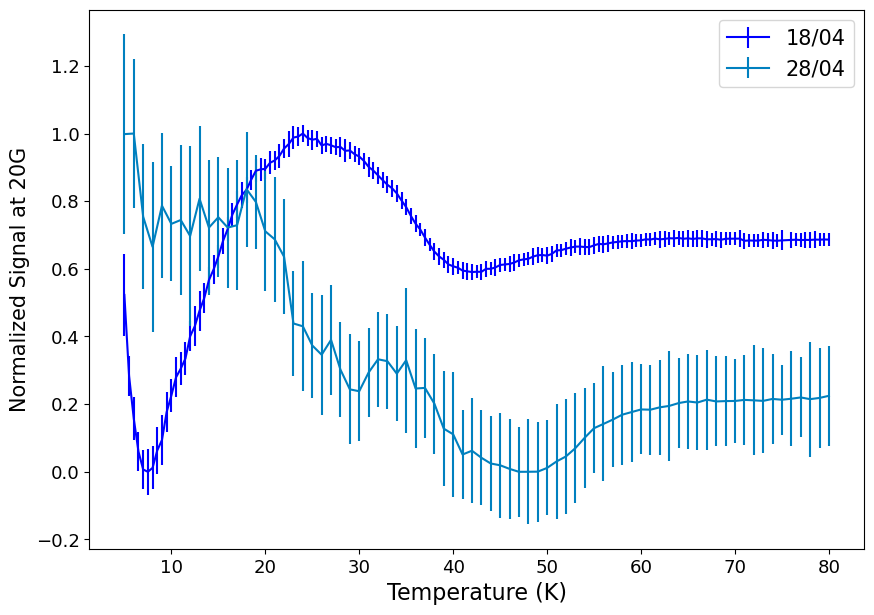

In [163]:
# data normalized

plt.figure(figsize=(10,7))

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 3))

# y1, yerr1 = normalize(tscan_25a_ag0[1], tscan_25a_ag0[2])
# plt.errorbar(tscan_25a_ag0[0], y1, yerr=yerr1, color=colors[2], label="07/04")#'Ag0-C25Y60C25\nNorm. factor=1/5811')

# Tmax1 = 59.
# plt.axvline(Tmax1, color='darkgreen', linestyle='--')


# x1 = tscan_25a_ag0[0]
# x_min, x_max = 60., 80.
# mask = (x1 >= x_min) & (x1 <= x_max) 
# x = x1[mask]
# y = y1[mask]
# index = np.argmin(y)
# # plt.axvline(x[index], color='darkgreen', linestyle='--')
# Tmin1 = x[index]


y2, yerr2 = normalize(tscan_25a_ag5[1], tscan_25a_ag5[2])
plt.errorbar(tscan_25a_ag5[0], y2, yerr=yerr2, color=colors[0],label="18/04")#'Ag5-C25Y60C25\nNorm. factor=1/2049')

y2, yerr2 = normalize(tscan_25a_ag5_check[1], tscan_25a_ag5_check[2])
plt.errorbar(tscan_25a_ag5_check[0], y2, yerr=yerr2, color=colors[1], label="28/04")#'25a CeO2/YBCO/CeO2 Ag5 28/04')

# y3, yerr3 = normalize(tscan_25a_ag0_check[1], tscan_25a_ag0_check[2])
# plt.errorbar(tscan_25a_ag0_check[0], y3, yerr=yerr3, color='darkgreen', label='Ag0')#-C25Y60C25\nNorm. factor=1/1387')

# y4, yerr4 = normalize(tscan_25a_ag0_2204[1], tscan_25a_ag0_2204[2])
# plt.errorbar(tscan_25a_ag0_2204[0], y4, yerr=yerr4, color=colors[1], label="22/04")#'25a CeO2/YBCO/CeO2 Ag0 22/04')

# # index = np.argmax(y4)
# # plt.axvline(tscan_25a_ag0_2204[0][index], color='purple', linestyle='--')
# Tmax4 = tscan_25a_ag0_2204[0][index]

# x4 = tscan_25a_ag0_2204[0]
# x_min, x_max = 50., 70.
# mask = (x4 >= x_min) & (x4 <= x_max) 
# x = x4[mask]
# y = y4[mask]
# index = np.argmin(y)
# # plt.axvline(x[index], color='purple', linestyle='--')
# Tmin4 = x[index]

# y5, yerr5 = normalize(tscan_25a_ag0_3004[1], tscan_25a_ag0_3004[2])
# plt.errorbar(tscan_25a_ag0_3004[0], y5+0.6, yerr=yerr5, color=colors[0], label="30/04")#'25a CeO2/YBCO/CeO2 Ag0 30/04 +0.6')

# y6, yerr6 = normalize(tscan_25a_ag0_3004_inplane[1], tscan_25a_ag0_3004_inplane[2])
# plt.errorbar(tscan_25a_ag0_3004_inplane[0], y6-0.2, yerr=yerr6, color='grey', label='25a CeO2/YBCO/CeO2 Ag0 30/04 inplane -0.2')

# # print(f'days:{15}')
# print(f'diff max T={Tmax1-Tmax4} ??')
# print(f'diff min T={Tmin1-Tmin4}')


# plt.axvline(9, linestyle='dashed', color='green')
# plt.axvline(74, linestyle='dashed', color='green')
# plt.axvline(7, linestyle='dashed', color='blue')
# plt.axvline(54, linestyle='dashed', color='blue')

# plt.xlim(50, 80)
# plt.ylim(0.5,1.1)
# plt.title("C25Y60C25", fontsize=16)
plt.xlabel("Temperature (K)", fontsize=16)
plt.ylabel("Normalized Signal at 20G", fontsize=15)
plt.legend(fontsize=15)
plt.tick_params(axis="both", which="major", labelsize=13)
plt.savefig(save_thesis+"25a ag5 degradation")
plt.show()


IndexError: index 0 is out of bounds for axis 0 with size 0

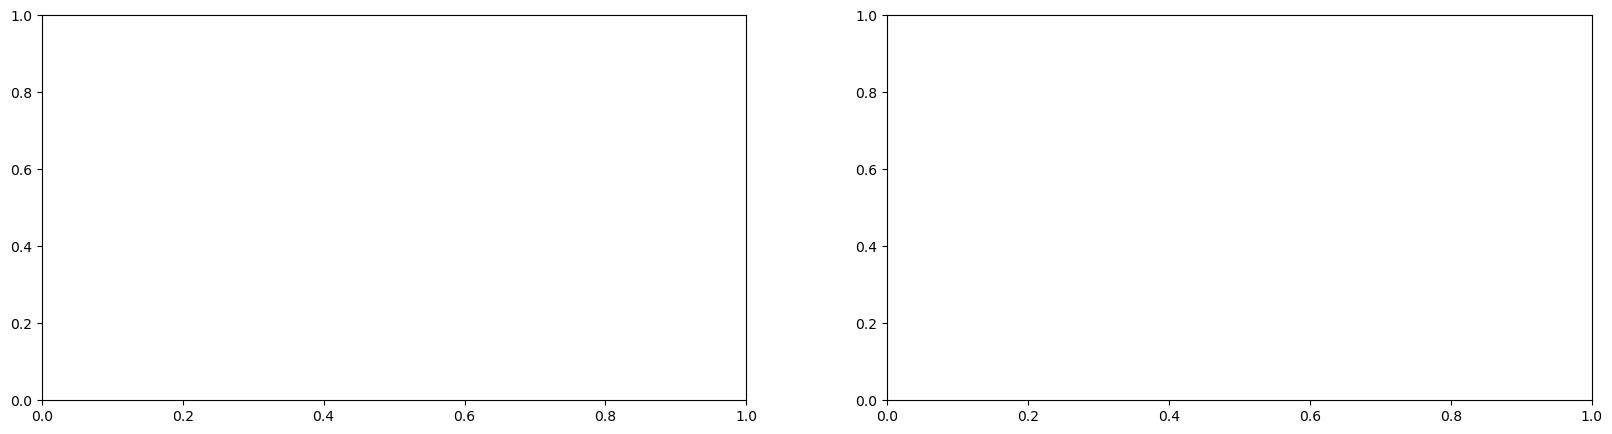

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

T = 40.0
i = np.where(temp_25a_ag0 == T)[0][0]
j = np.where(temp_27a_ag0 == T)[0][0]
print(f"i={i}-->T={temp_25a_ag0[i]}")
print(f"j={j}-->T={temp_27a_ag0[j]}")

ax1.plot(field_25a_ag0[i], int_25a_ag0[i], label="25a Ag0")
ax1.plot(field_27a_ag0[j], int_27a_ag0[j], label="27a Ag0")
ax1.set_title(f"T={temp_25a_ag0[i]}K")
ax1.legend()

j,i=-1,-1 #for RT
ax2.plot(field_25a_ag0[i], int_25a_ag0[i], label="25a Ag0")
ax2.plot(field_27a_ag0[j], int_27a_ag0[j], label="27a Ag0")

ax2.set_title(f"T={temp_25a_ag0[i]}K")
ax2.legend()
#plt.xlim(0,80)
plt.show()




C:\Users\Costa\AppData\Local\Temp\ipykernel_11580\3713294656.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


[  5.     5.     5.     9.    15.    20.    30.    40.    48.    55.
  60.    70.    80.   100.   150.   295.23] [5.] [  5.   297.24] [  5.    15.    30.    45.    60.    80.   100.   150.   296.28]


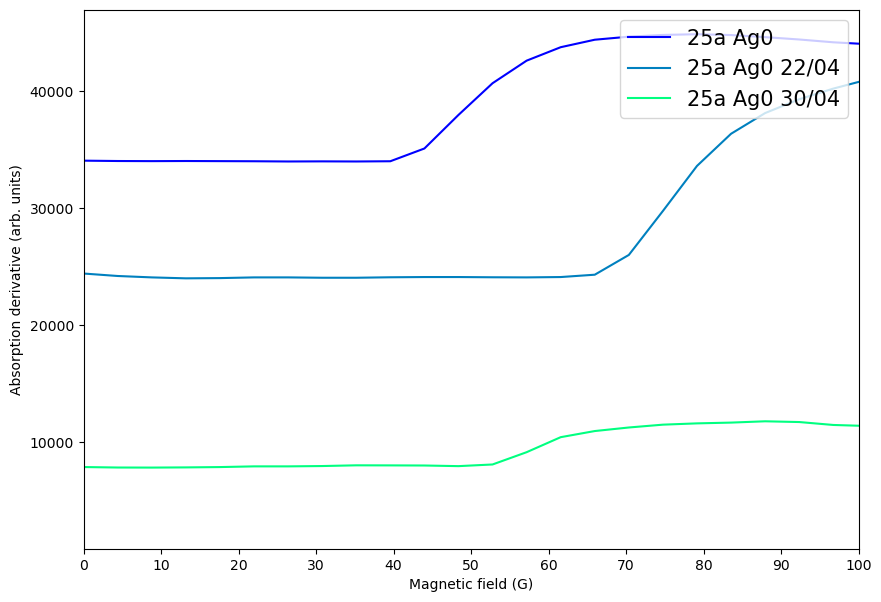

In [28]:
i=0
j=0

plt.figure(figsize=(10,7))

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 3))
# print(colors) 
# print(int_25a_ag0.shape)
plt.plot(field_25a_ag0[i], int_25a_ag0[i], color=colors[0], label="25a Ag0")
plt.plot(field_25a_ag0_2204[i], int_25a_ag0_2204[i],color=colors[1], label="25a Ag0 22/04")
plt.plot(field_25a_ag0_3004[j], int_25a_ag0_3004[i],color=colors[2], label="25a Ag0 30/04")

# plt.plot(field_25a_ag5[i], int_25a_ag5[i], color="blue", label="Ag5 18/04")
# plt.plot(field_25a_ag5_check[j], int_25a_ag5_check[j], label="Ag5 28/04")
# print(temp_25a_ag5_check[j])

# plt.plot(field_25a_ag10[i], int_25a_ag10[i], color="red", label=f"Ag10")#, T={temp_25a_ag10[i]}K")
# plt.plot(field_25a_ag15[i], int_25a_ag15[i], color="black", label=f"Ag15")#, T={temp_25a_ag15[i]}K")

# plt.plot(field_25a_ag10[j], int_25a_ag10[j]-200, label=f"25a Ag10, T={temp_25a_ag10[j]}K")
# plt.plot(field_25a_ag15[j], int_25a_ag15[j]-200, label=f"25a Ag15, T={temp_25a_ag15[j]}K")

print(temp_25a_ag0, temp_25a_ag5, temp_25a_ag10, temp_25a_ag15)

plt.xlim(0,100)
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
# plt.gca().set_yticklabels([])
plt.ylabel("Absorption derivative (arb. units)")
plt.xlabel('Magnetic field (G)')
plt.legend(loc='upper right', fontsize=15)#, borderpad=1, fontsize=15)
# plt.savefig(save_thesis+"25a, ag 5")
plt.show()


C:\Users\Costa\AppData\Local\Temp\ipykernel_2540\2148947593.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colormap = get_cmap("winter")


(16, 2048)
[  5.     5.     5.     9.    15.    20.    30.    40.    48.    55.
  60.    70.    80.   100.   150.   295.23] [5.] [  5.   297.24] [  5.    15.    30.    45.    60.    80.   100.   150.   296.28]


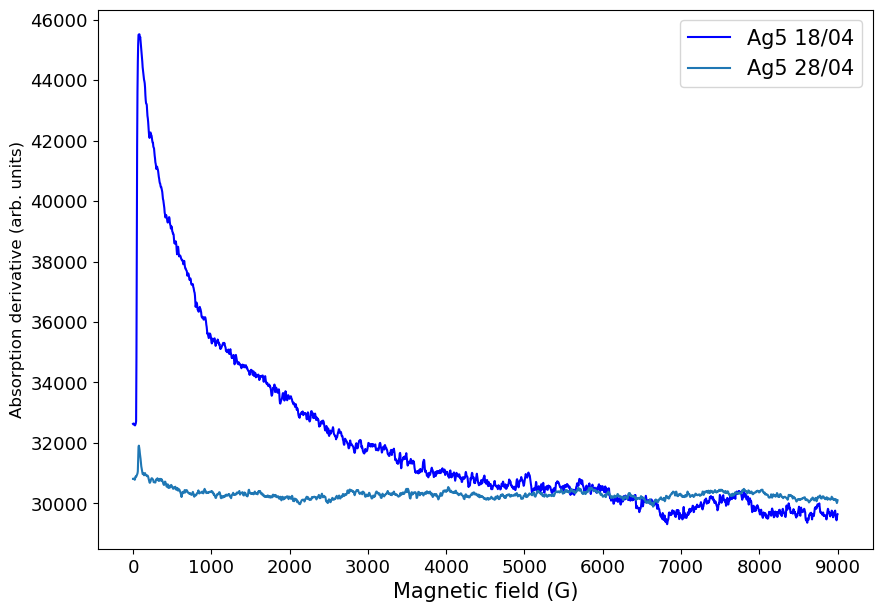

In [164]:
i=0
j=0

plt.figure(figsize=(10,7))

colormap = get_cmap("winter")
colors = colormap(np.linspace(0, 1, 3))
# print(colors) 
print(int_25a_ag0.shape)
# plt.plot(field_25a_ag0[i], int_25a_ag0[i], color=colors[0], label="25a Ag0")
# plt.plot(field_25a_ag0_2204[i], int_25a_ag0_2204[i],color=colors[1], label="25a Ag0 22/04")
# plt.plot(field_25a_ag0_3004[j], int_25a_ag0_3004[i],color=colors[2], label="25a Ag0 30/04")

plt.plot(field_25a_ag5[i], int_25a_ag5[i], color="blue", label="Ag5 18/04")
plt.plot(field_25a_ag5_check[j], int_25a_ag5_check[j], label="Ag5 28/04")
# print(temp_25a_ag5_check[j])

# plt.plot(field_25a_ag10[i], int_25a_ag10[i], color="red", label=f"Ag10")#, T={temp_25a_ag10[i]}K")
# plt.plot(field_25a_ag15[i], int_25a_ag15[i], color="black", label=f"Ag15")#, T={temp_25a_ag15[i]}K")

# plt.plot(field_25a_ag10[j], int_25a_ag10[j]-200, label=f"25a Ag10, T={temp_25a_ag10[j]}K")
# plt.plot(field_25a_ag15[j], int_25a_ag15[j]-200, label=f"25a Ag15, T={temp_25a_ag15[j]}K")

print(temp_25a_ag0, temp_25a_ag5, temp_25a_ag10, temp_25a_ag15)


plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=10))
# plt.gca().set_yticklabels([])
plt.ylabel("Absorption derivative (arb. units)", fontsize=12)
plt.xlabel('Magnetic field (G)', fontsize=15)
plt.legend(loc='upper right', fontsize=15)#, borderpad=1, fontsize=15)
plt.tick_params(axis="both", which="major", labelsize=13)
# plt.savefig(save_thesis+"25a, ag all")
plt.savefig(save_thesis+"25a, ag 5")
plt.show()


i=0-->T=5.0
i=0-->T=5.0


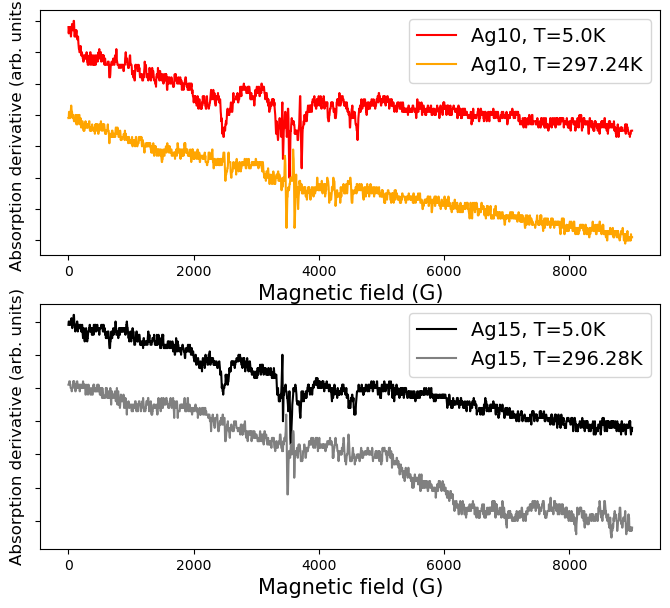

In [117]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(8, 7))

T = 5.0
i = np.where(temp_25a_ag10 == T)[0][0]
print(f"i={i}-->T={temp_25a_ag10[i]}")
j = -1

ax1.plot(field_25a_ag10[i], int_25a_ag10[i], color="red", label=f"Ag10, T={temp_25a_ag10[i]}K")
ax1.plot(field_25a_ag10[j], int_25a_ag10[j]-100, color="orange", label=f"Ag10, T={temp_25a_ag10[j]}K")
# ax1.set_title()
ax1.set_yticklabels([])
ax1.set_xlabel('Magnetic field (G)', fontsize=15)
ax1.set_ylabel("Absorption derivative (arb. units)", fontsize=12)
ax1.legend(fontsize=14)

T = 5.0
i = np.where(temp_25a_ag15 == T)[0][0]
print(f"i={i}-->T={temp_25a_ag15[i]}")
j=-1

ax2.plot(field_25a_ag15[i], int_25a_ag15[i], color="black",label=f"Ag15, T={temp_25a_ag15[i]}K")
ax2.plot(field_25a_ag15[j], int_25a_ag15[j]-200,color="grey", label=f"Ag15, T={temp_25a_ag15[j]}K")
ax2.set_yticklabels([])
ax2.set_ylabel("Absorption derivative (arb. units)", fontsize=12)
ax2.set_xlabel('Magnetic field (G)', fontsize=15)

# ax2.set_title(f"T={temp_25a_ag15[i]}K")
ax2.legend(fontsize=14)
#plt.xlim(0,80)
plt.savefig(save_thesis+"25a, ag 10 and 15")

plt.show()


